FIRST PART
HERE, WE WOULD VISUALIZE THE IRIS DATASET

Import the necessary packages

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load the dataset

In [2]:
raw_data = pd.read_csv("Dataset/iris.csv")

In [3]:
raw_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Exploring the flower features uisng visualizations

In [4]:
#brief statistical overview of the data
raw_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#check for missing values
raw_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0.5, 1.0, 'Count Plot of the Flower Species')

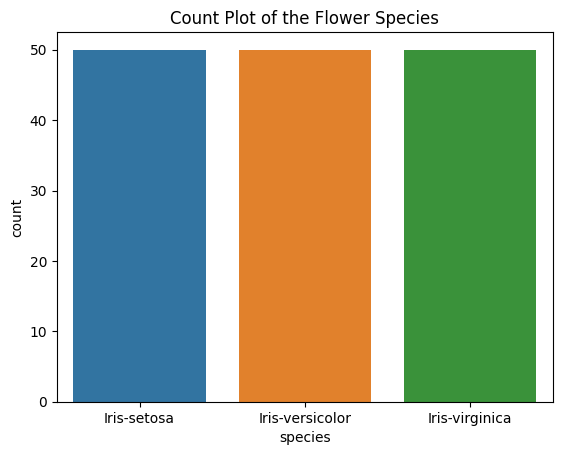

In [7]:
#getting a count plot of the species
sns.countplot(raw_data, x = 'species', hue = 'species')
plt.title("Count Plot of the Flower Species")

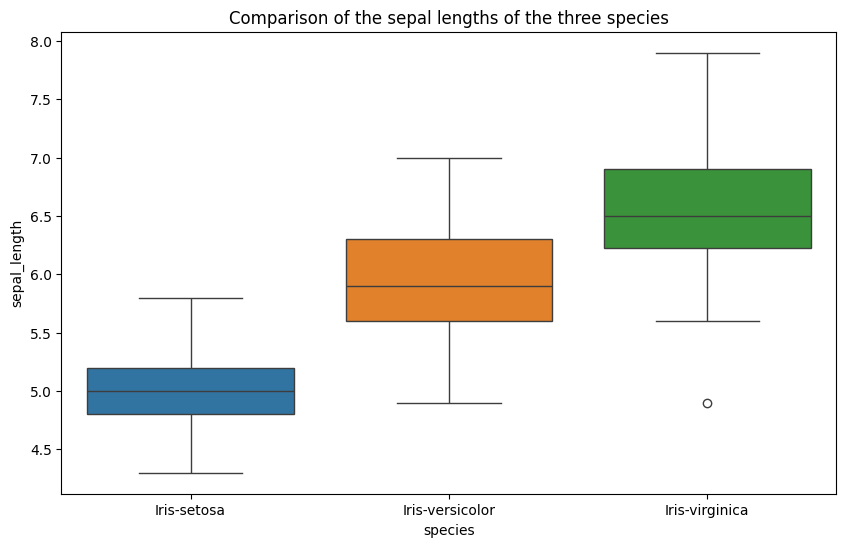

In [8]:
#comparing the sepal lengths of the three species
#filtered_specie = raw_data[raw_data['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

plt.figure(figsize = (10,6))
sns.boxplot(raw_data, x='species', y='sepal_length', hue = 'species')
plt.title('Comparison of the sepal lengths of the three species')
plt.show()

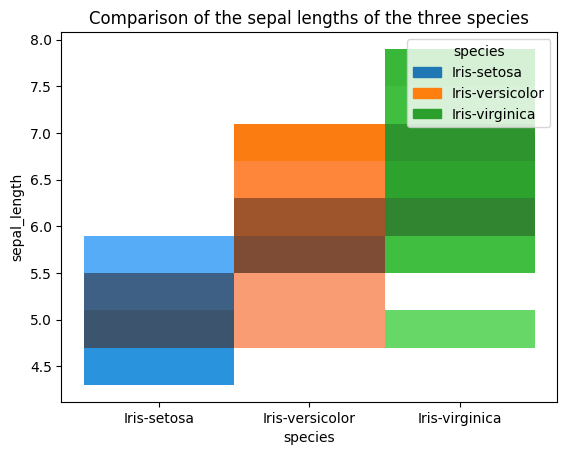

In [9]:
sns.histplot(raw_data, x = 'species', y='sepal_length', hue='species')
plt.title('Comparison of the sepal lengths of the three species')
plt.show()

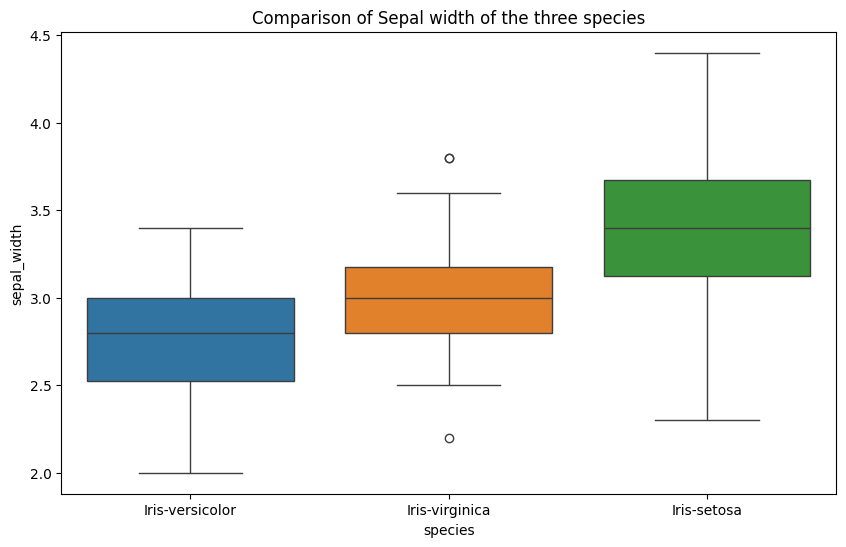

In [10]:
#comparing the sepal width of the three species
plt.figure(figsize = (10, 6))
sns.boxplot(x='species',y='sepal_width',data=raw_data.sort_values('sepal_width',ascending=True), hue = 'species')

plt.title("Comparison of Sepal width of the three species")
plt.show()

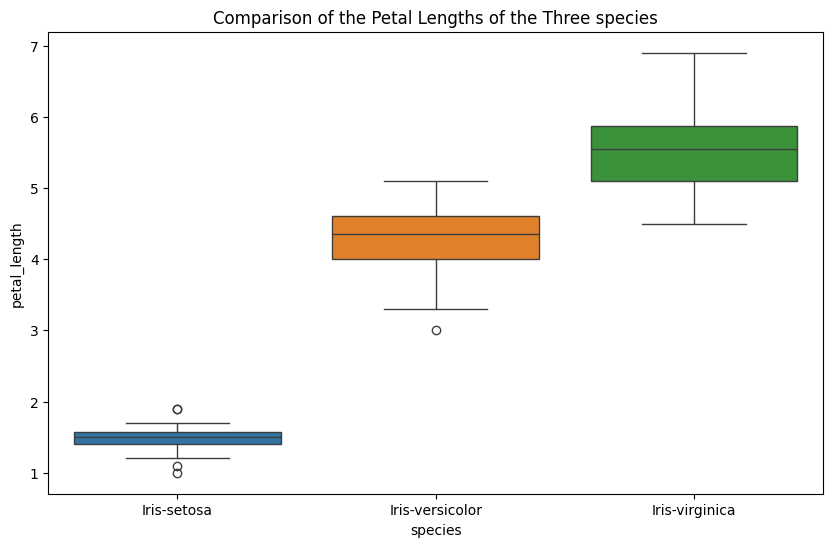

In [11]:
#comparing the petal length of the three species
plt.figure(figsize = (10, 6))
sns.boxplot(x= 'species', y = 'petal_length', data = raw_data.sort_values('petal_length', ascending=True), hue = 'species')
plt.title('Comparison of the Petal Lengths of the Three species')
plt.show()

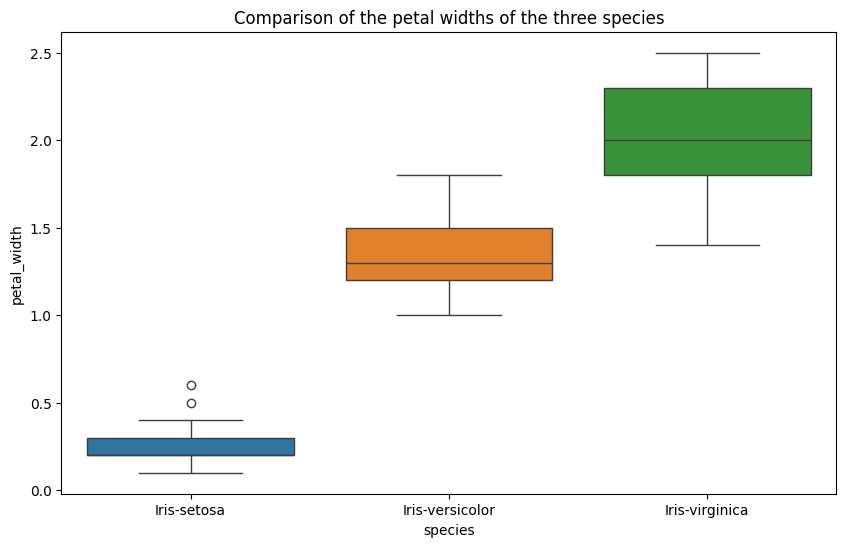

In [12]:
#comparing the petal Width of the three species
plt.figure(figsize = (10,6))
plt.title("Comparison of the petal widths of the three species")
sns.boxplot(x = 'species', y='petal_width', data = raw_data.sort_values('petal_width', ascending = True), hue = 'species')
plt.show()

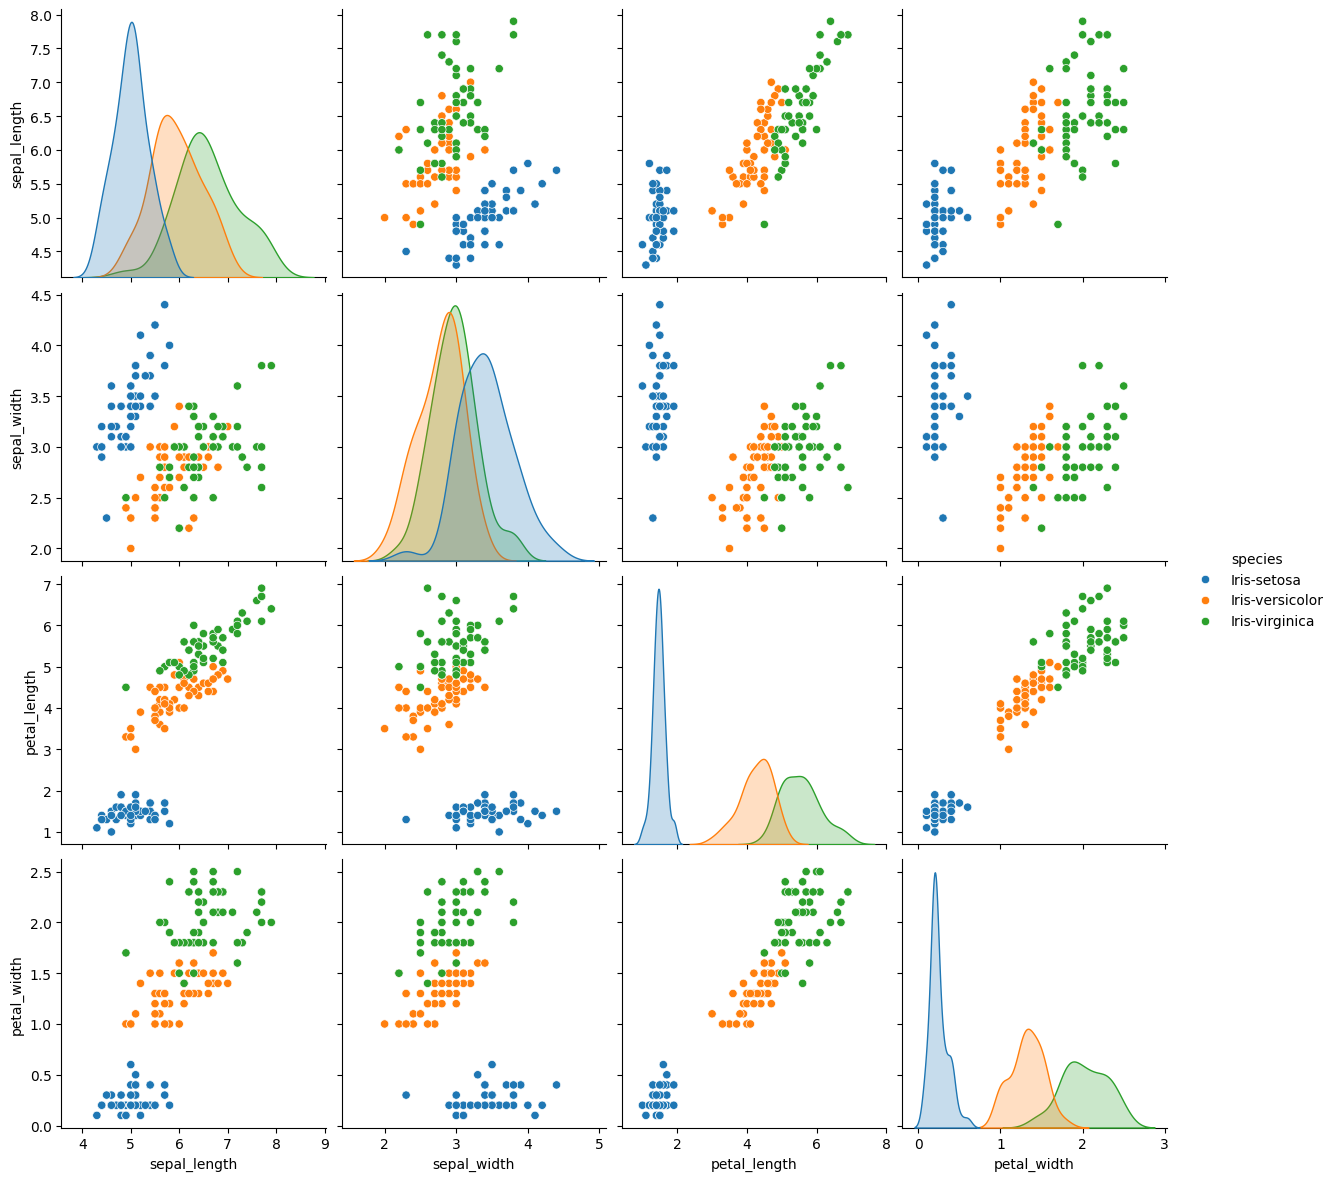

In [13]:
#creating a pairplot 
sns.pairplot(raw_data, hue = 'species', height = 3)


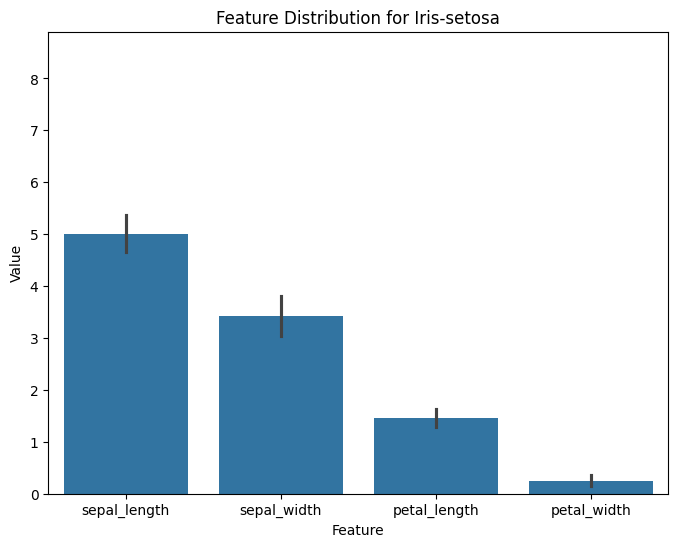

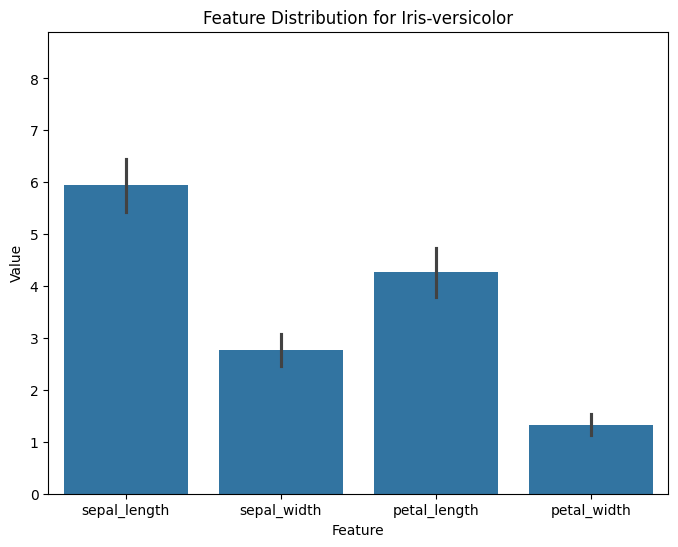

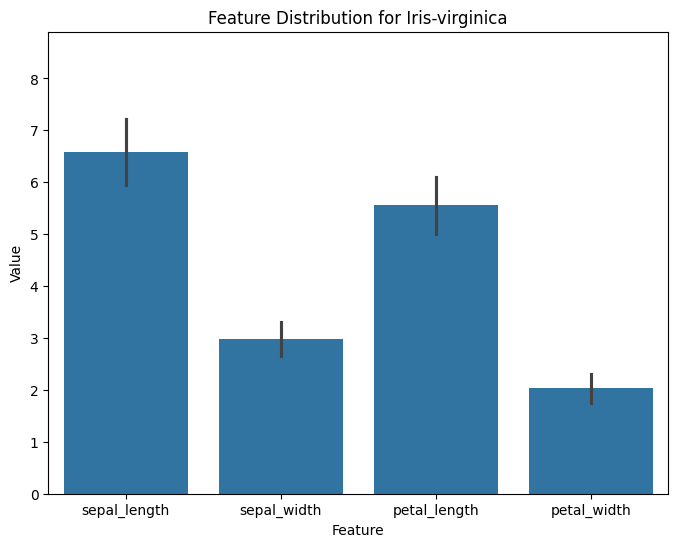

In [14]:
#Feature Distribution for each specie

specie_list = raw_data['species'].unique()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for specie in specie_list:
    specie_data = raw_data[raw_data['species'] == specie][features]
    melt_data = pd.melt(specie_data, var_name = 'feature', value_name='value')
     # Plot the feature distribution for the current species
    plt.figure(figsize=(8, 6))
    sns.barplot(data=melt_data, x='feature', y='value', errorbar="sd")
    plt.title(f"Feature Distribution for {specie.capitalize()}")
    plt.xlabel("Feature")
    plt.ylabel("Value")
    plt.ylim(0, raw_data[features].max().max() + 1)  # Ensure consistent y-axis
    plt.show()

In [15]:
# A function to calculate covariance

def cov(x, y):
    mean_x = sum(x) / float(len(x)) #to calculate the mean of x
    mean_y = sum(y) / float(len(y)) #to calculate the mean of y

    sub_x = [i - mean_x for i in x ] #subtracting the mean from each x variable 
    sub_y = [i - mean_y for i in y] #subtracting the mean from each y variable
    sum_value =  sum([sub_x[i] * sub_y[i] for i in range (len(x))]) # sum of all the product difference

    denom = float (len(x) - 1) 

    covariance_value = sum_value / denom # divide the sum by the number of samples

    return covariance_value
    
        

    

 

In [16]:
# A function to calculate covariance matrix

def covMat(arr):
    c = [[cov(a,b) for a in arr.T] for b in arr.T]
    return np.array(c)

Using the Np.Cov Method

In [17]:
#using the np function to compute the covariance
numeric_data = raw_data.drop(['species'], axis = 1)
new_data = numeric_data.values
cov_iris = np.cov(new_data, rowvar=False)
print("Covariance Matrix:\n", cov_iris)

Covariance Matrix:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


Using the Covariance Matrix Function I Computed

In [18]:
#using the function I computed

computed_covariance = covMat(new_data)
print("Computed Covariance matrix", computed_covariance)

Computed Covariance matrix [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [19]:
#using the covariance function to calculate the correlation matrix
# Define the correlation matrix function

def corrMat(arr):
    # Get the covariance matrix
    covariance_matrix = covMat(arr)
    
    # Calculate standard deviations for each feature
    std_devs = np.std(arr, axis=0)
    
    # Calculate the correlation matrix
    correlation_matrix = np.array([
        [covariance_matrix[i, j] / (std_devs[i] * std_devs[j]) for j in range(len(std_devs))]
        for i in range(len(std_devs))
    ])
    
    return correlation_matrix

Using the np library

In [20]:
#testing using np.corr
corr_coef = np.corrcoef(new_data, rowvar=False)
print("Correlation Coefficient:\n", corr_coef)

Correlation Coefficient:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [21]:
computed_correlation = corrMat(new_data)
print("Computed Correlation matrix", computed_correlation)

Computed Correlation matrix [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


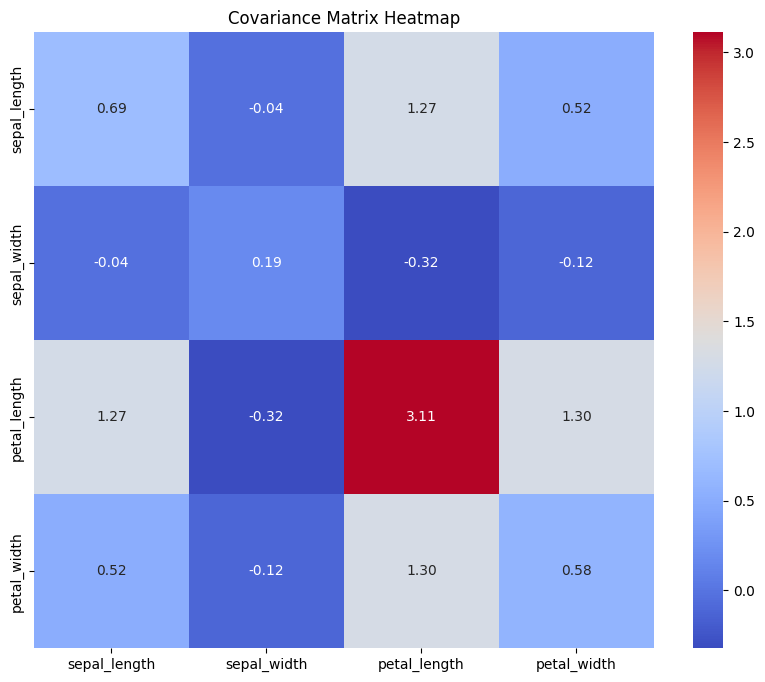

In [22]:
#plotting the visualization of the results

# Plot the covariance matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_iris , annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=raw_data.columns[:-1], yticklabels=raw_data.columns[:-1])
plt.title("Covariance Matrix Heatmap")
plt.show()



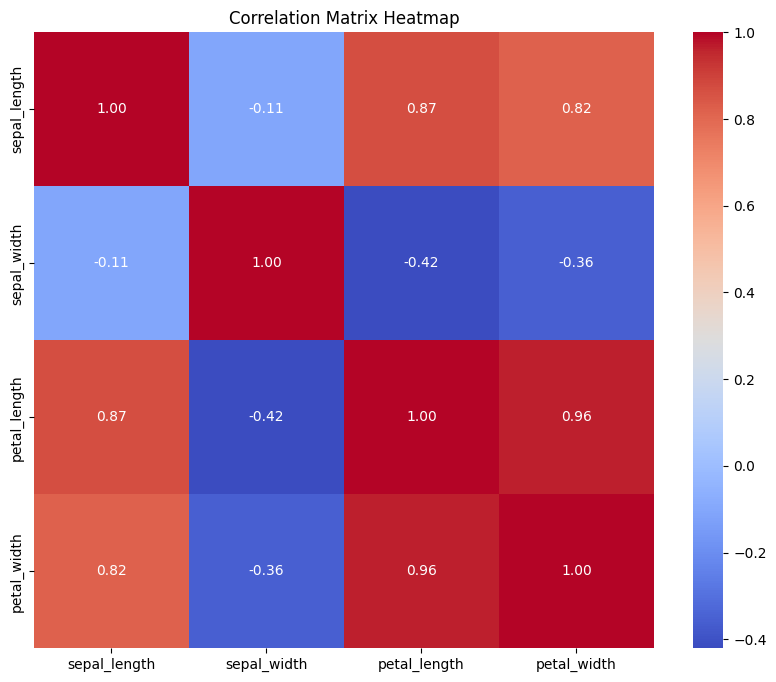

In [23]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_coef, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=raw_data.columns[:-1], yticklabels=raw_data.columns[:-1])
plt.title("Correlation Matrix Heatmap")
plt.show()

SECOND PART
HERE, WE WILL VISUALIZE THE LAPTOP DATASET

Q2- Working on the Laptop Price Dataset

In [24]:
laptop_data = pd.read_csv('Dataset/laptop_price - dataset.csv')

In [25]:
laptop_data.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [26]:
laptop_data.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [47]:
laptop_data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

Plot the Prices of the Laptops

In [48]:
# Interactive scatter plot
plt.figure(figsize = (30,30))
fig = px.scatter(laptop_data, x='Product', y='Price (Euro)', color='Company', hover_data=['TypeName', 'RAM (GB)'])
fig.show()

<Figure size 3000x3000 with 0 Axes>

Because of too much data, plotting all the data points will be overcrowded, hence I am plotting the prices of the top 20 most expensive and top 20 least expensive

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3342313869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')


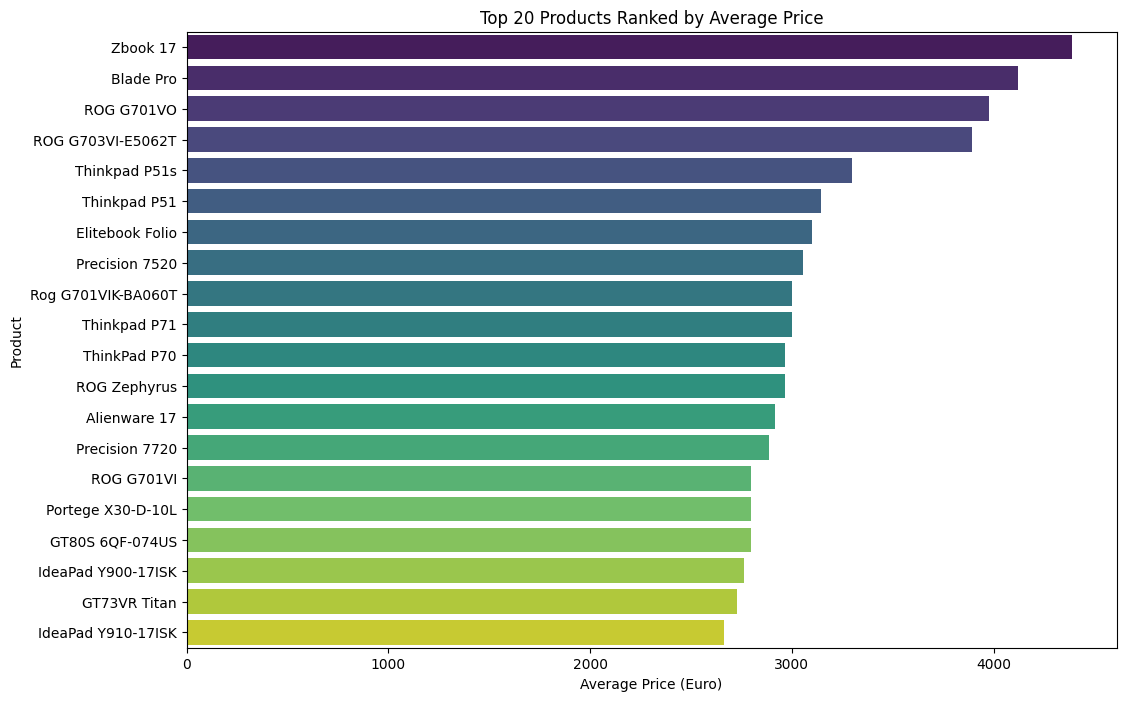

In [41]:


# Calculate the mean price for each product and rank them
ranked_products = laptop_data.groupby('Product')['Price (Euro)'].mean().sort_values(ascending=False).head(20)

# Plot the ranked distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')
plt.title('Top 20 Products Ranked by Average Price')
plt.xlabel('Average Price (Euro)')
plt.ylabel('Product')
plt.show()


/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3196685556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')


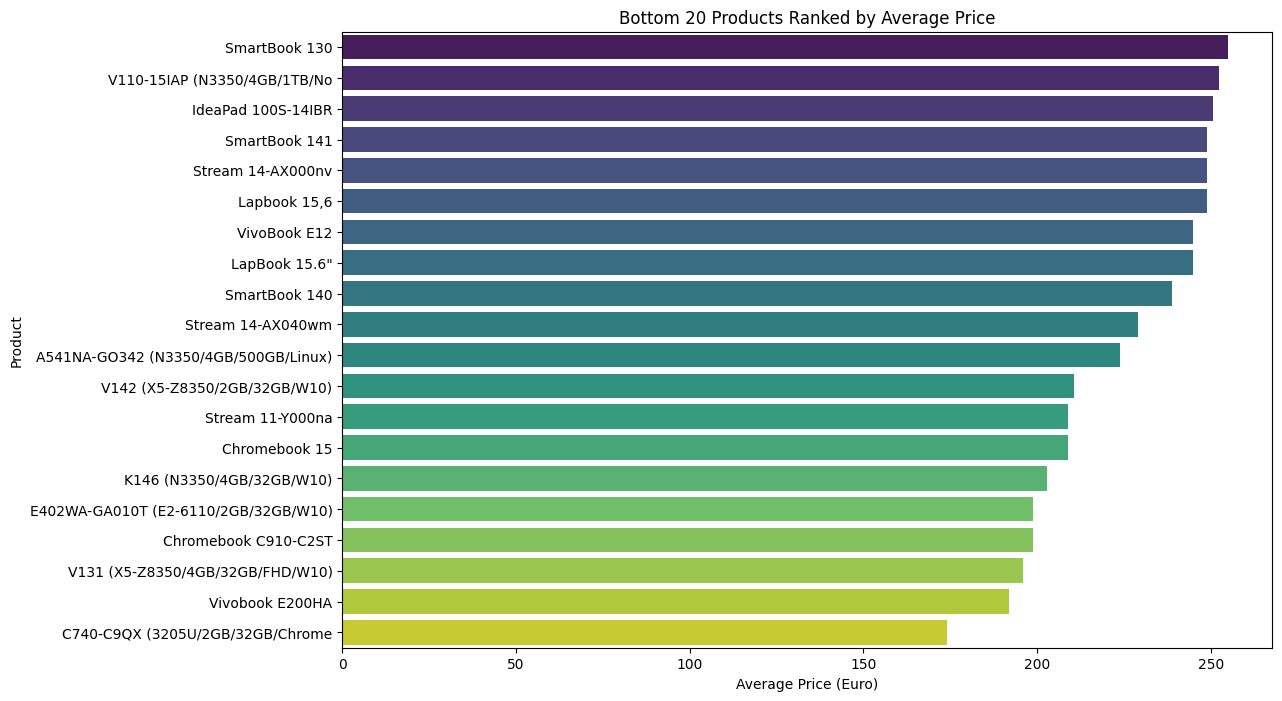

In [42]:
# Calculate the mean price for each product and rank them
ranked_products = laptop_data.groupby('Product')['Price (Euro)'].mean().sort_values(ascending=False).tail(20)

# Plot the ranked distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')
plt.title('Bottom 20 Products Ranked by Average Price')
plt.xlabel('Average Price (Euro)')
plt.ylabel('Product')
plt.show()

We are getting the company with the most expensive laptopns and avearge prices of each company

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/1591875745.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




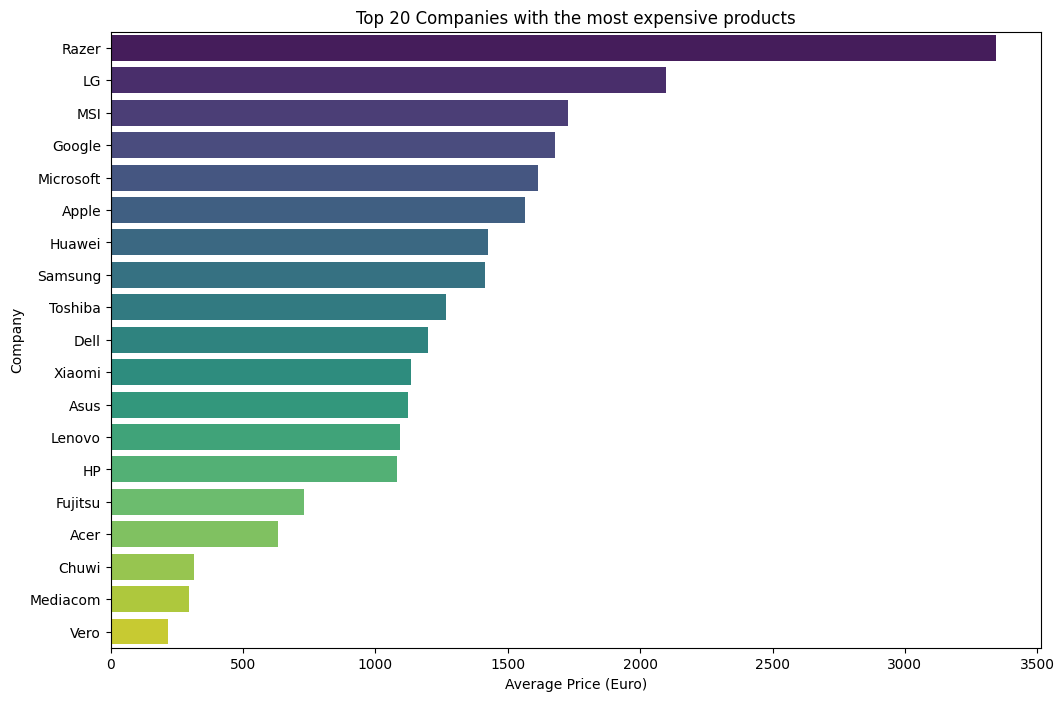

The company with the most expensive laptops on average is Razer with an average price of 3346.14 Euro.

Average laptop price for each company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


In [50]:
# Calculate the mean price per company
ranked_products = laptop_data.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False).head(20)

# Plot the ranked distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')
plt.title('Top 20 Companies with the most expensive products')
plt.xlabel('Average Price (Euro)')
plt.ylabel('Company')
plt.show()

# Company with the most expensive laptops
most_expensive_company = ranked_products.index[0]
most_expensive_price = ranked_products.iloc[0]
print(f"The company with the most expensive laptops on average is {most_expensive_company} with an average price of {most_expensive_price:.2f} Euro.\n")

# Average laptop price for each company
print("Average laptop price for each company:")
print(ranked_products)

Find the different types of Operating systems present in the data - under the column
name "OpSys"

In [ ]:
laptop_data['OpSys'].unique() #get the unique values of the operating system column

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
#replace the OS systems that belong to the same system

mapping_OS = {'Mac OS X': 'macOS',
              'macOS': 'macOS',
              'No OS': 'No OS',
              'Windows 10': 'Windows',
              'Windows 10 S': 'Windows',
              'Windows 7': 'Windows',
              'Chrome OS': 'Linux',
              'Linux': 'Linux',
              'Android': 'Android'}
laptop_data['OpSys'].replace(mapping_OS, inplace=True)

In [59]:
laptop_data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows', 'Linux', 'Android'], dtype=object)

Plot for each Operating system types, the price distribution


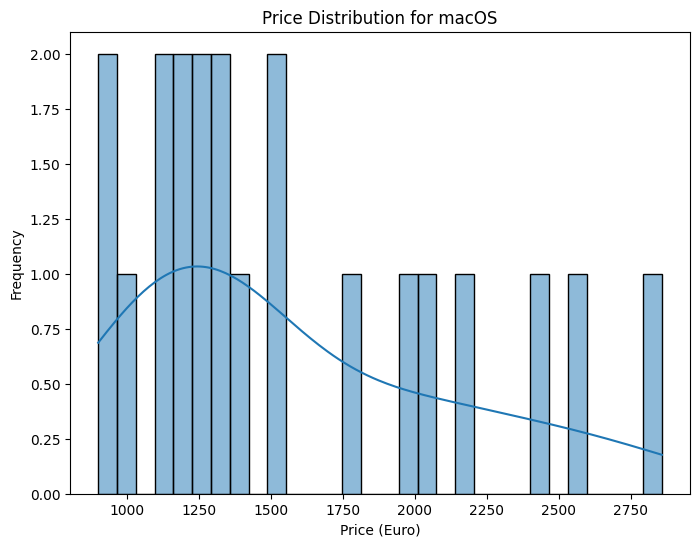

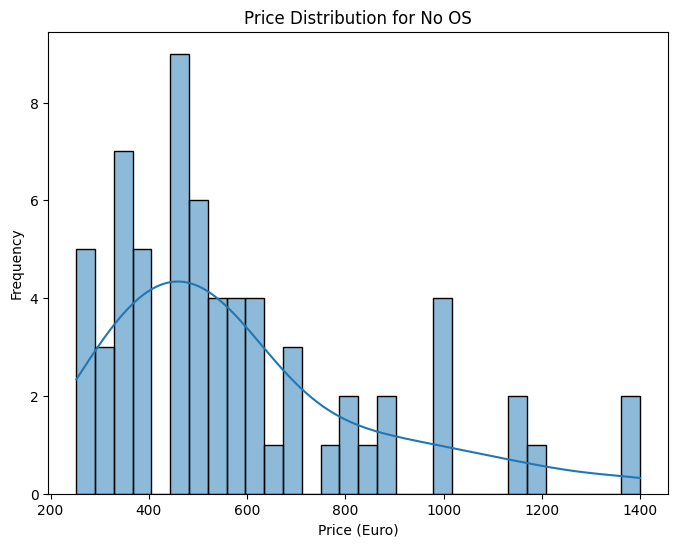

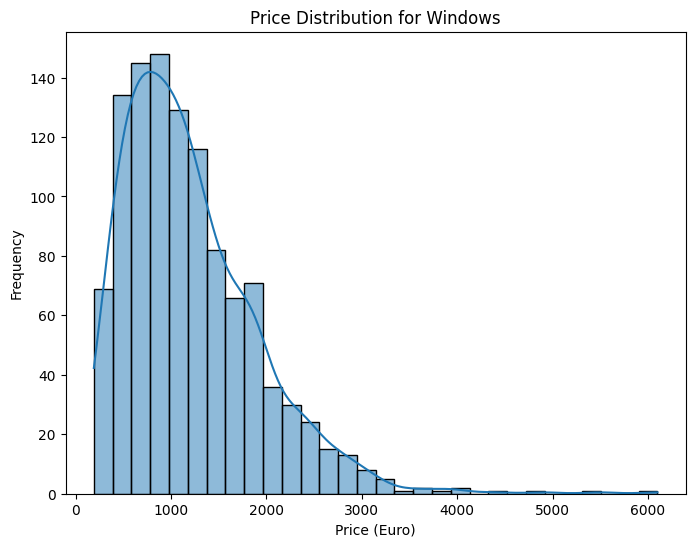

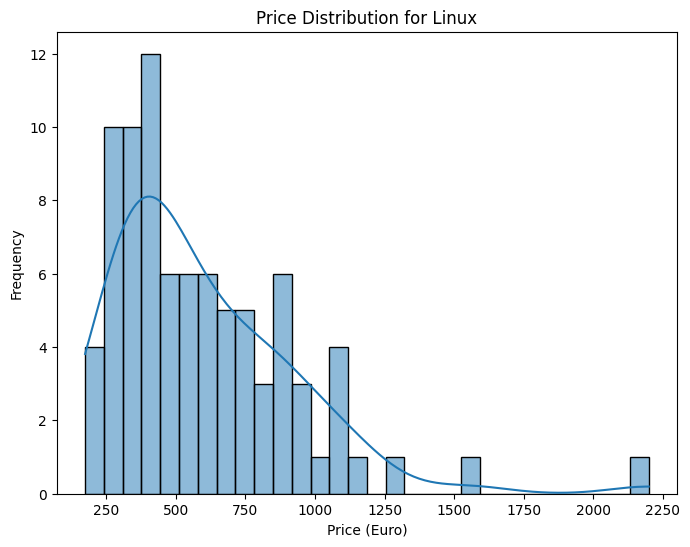

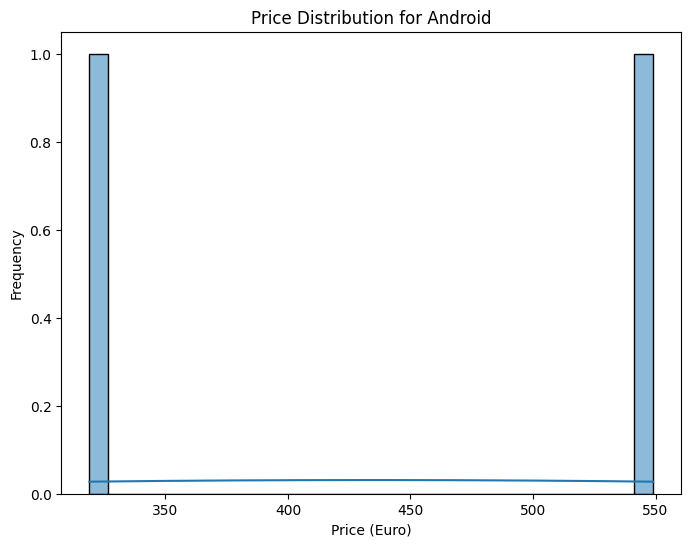

In [68]:
for operatingsys in laptop_data['OpSys'].unique():
    
    # Filter data for the current operating system
    filtered_data = laptop_data[laptop_data['OpSys'] == operatingsys]
    #Create a plot for the price distribution of the current OS
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.histplot(filtered_data['Price (Euro)'], kde=True, bins=30)
    plt.title(f'Price Distribution for {operatingsys}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Frequency')
    plt.show()


Updating the above code by differentiating the distribution by Company

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



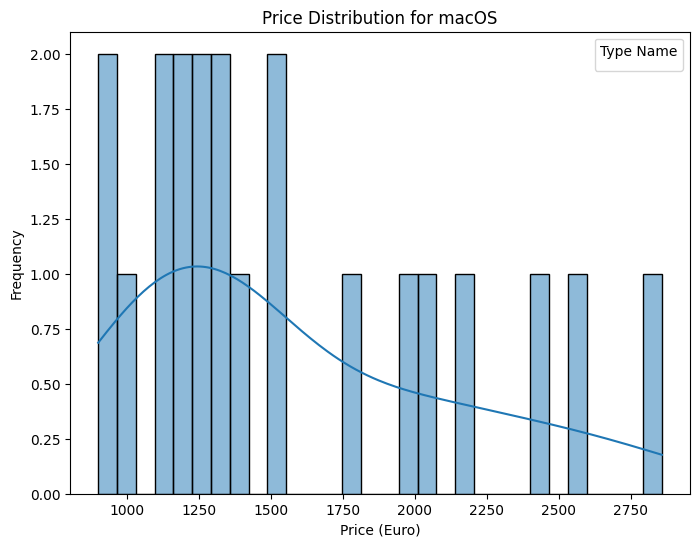

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



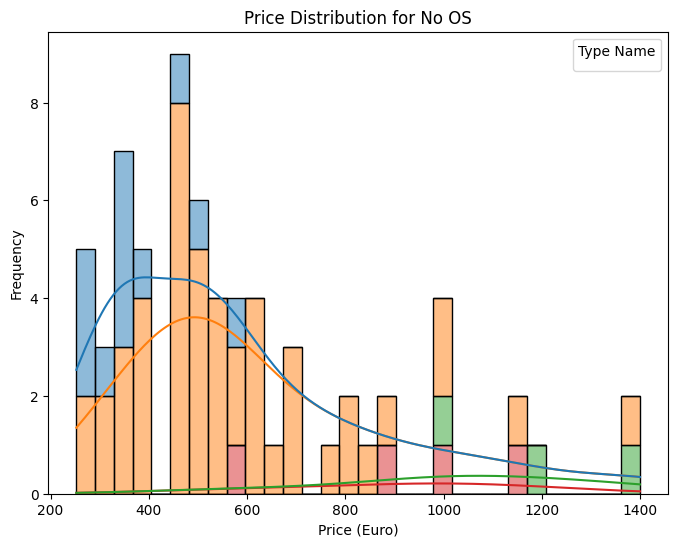

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



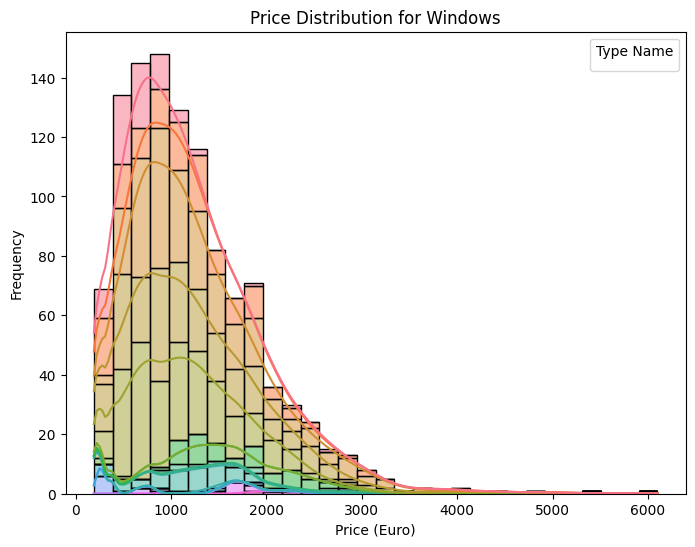

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



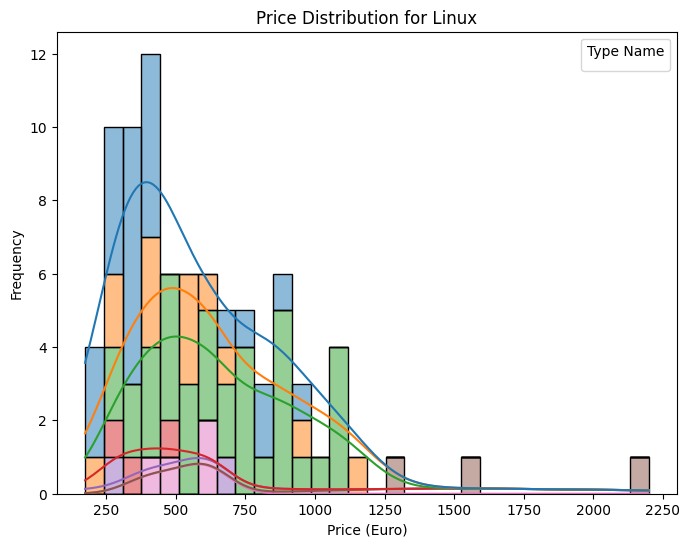

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



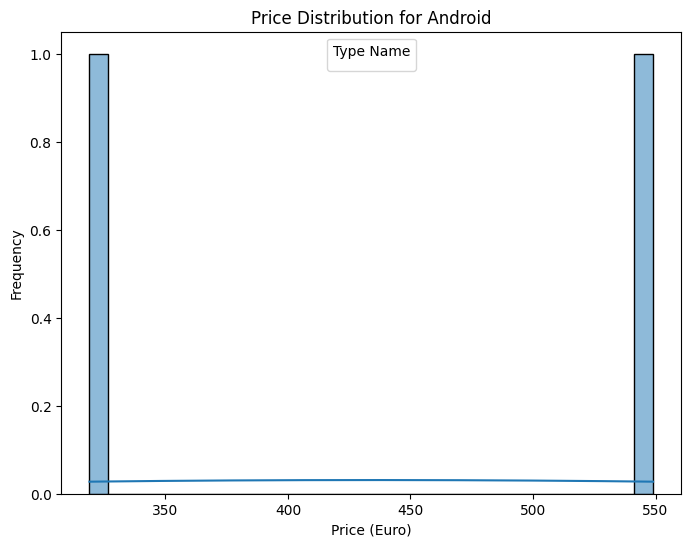

In [69]:
for operatingsys in laptop_data['OpSys'].unique():
    # Filter data for the current operating system
    filtered_data = laptop_data[laptop_data['OpSys'] == operatingsys]

    # Create a plot for the price distribution of the current OS with hue
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.histplot(data=filtered_data, x='Price (Euro)', kde=True, bins=30, hue='Company', multiple='stack')
    plt.title(f'Price Distribution for {operatingsys}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Frequency')
    plt.legend(title='Type Name')
    plt.show()


Relationship between RAM and Computer Price

Correlation between RAM and Price: 0.74028652716227


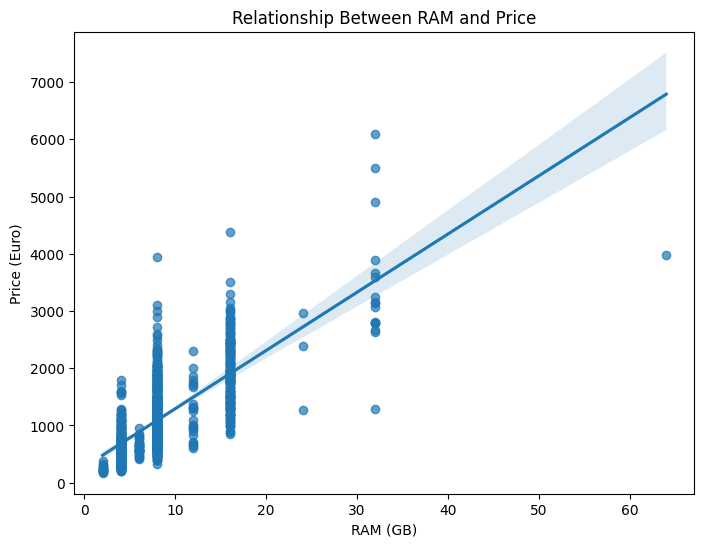

In [71]:
correlation_laptop = laptop_data['RAM (GB)'].corr(laptop_data['Price (Euro)'])
print(f"Correlation between RAM and Price: {correlation_laptop}")

#plotting a scatterplot with a regresison line to visualize the relationship

plt.figure(figsize=(8, 6))
sns.regplot(data=laptop_data, x='RAM (GB)', y='Price (Euro)', scatter_kws={'alpha':0.7})
plt.title('Relationship Between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()

Extracting Storage type from memory

In [74]:
#laptop_data['Storage Type'] = laptop_data['Memory'].str.split().str[-1]

# Split and join words after the first part
laptop_data['Storage Type'] = laptop_data['Memory'].apply(lambda x: ' '.join(x.split()[1:]))


In [78]:
laptop_data['Storage Type'].head(5)


0              SSD
1    Flash Storage
2              SSD
3              SSD
4              SSD
Name: Storage Type, dtype: object

Think of additional questions related to this data. What types of analyses and
visualizations would you use to address them? Select two questions from your list and
implement. Submit your list of questions, suggested analyses and visualizations and the
implementation.

1. What top features positively influence the price of the laptop?
2. Which laptop feature is each of the company known for? - this allows us to know which company dominnates which laptop feature market.
3. What brands produce the best value for money laptops? (budget friendly)
4. Does hybrid storage (SSD + HDD) impact the price signifiantly?
5. What is the price difference between gaming laptops and other types?
6. What combination of features offers the best balance between proce and performance?

Top 3 features most correlated with Price:
RAM (GB)        0.740287
Storage Type    0.514201
CPU_Type        0.473860
Name: Price (Euro), dtype: float64


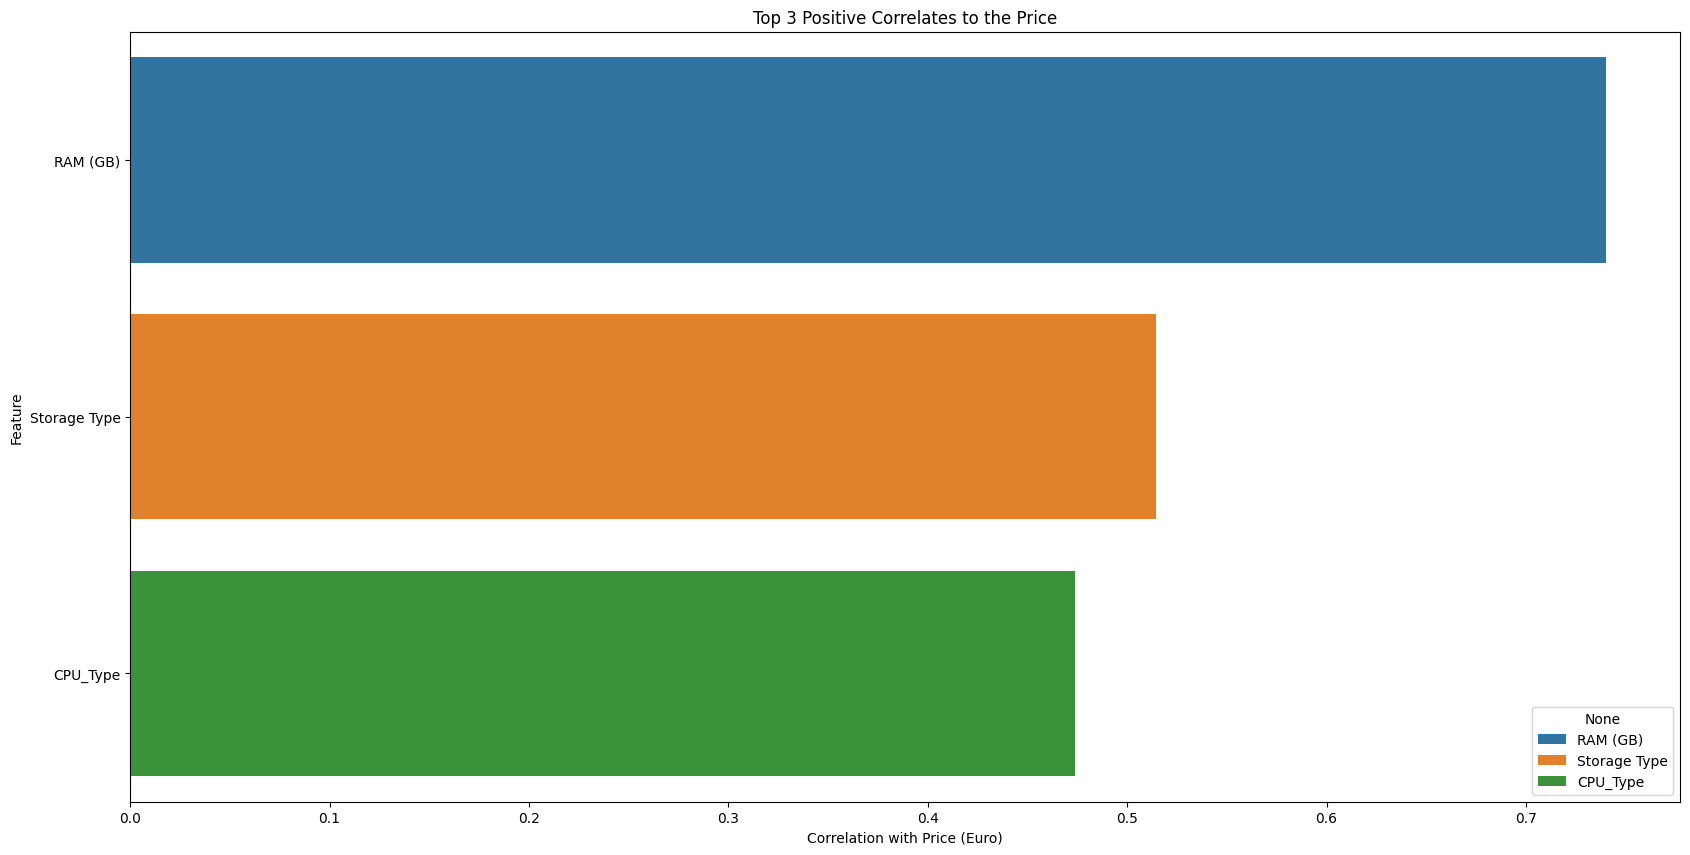

In [ ]:
#Q1
from sklearn.preprocessing import LabelEncoder

# Encode all categorical features
laptop_data_encoded = laptop_data.copy()
label_encoder = LabelEncoder()

for col in laptop_data.select_dtypes(include=['object']).columns:  # Only categorical columns
    laptop_data_encoded[col] = label_encoder.fit_transform(laptop_data[col])

# Find correlation with Price (Euro)
correlation_matrix = laptop_data_encoded.corr()

# Extract correlations with Price (Euro) and sort in descending order
correlation_with_price = correlation_matrix['Price (Euro)'].sort_values(ascending=False)

# Select the top 3 correlating features (excluding Price itself)
top_3_correlates = correlation_with_price[1:4]  # Skip the first as it is Price itself

# Display results
print("Top 3 features most correlated with Price:")
print(top_3_correlates)

plt.figure(figsize = (20,10))
sns.barplot(x = top_3_correlates.values, y = top_3_correlates.index, hue = top_3_correlates.index, legend = True )
plt.title('Top 3 Positive Correlates to the Price')

plt.xlabel('Correlation with Price (Euro)')
plt.ylabel('Feature')
plt.show()


In [82]:
laptop_data['GPU_Type'].unique()

array(['Iris Plus Graphics 640', 'HD Graphics 6000', 'HD Graphics 620',
       'Radeon Pro 455', 'Iris Plus Graphics 650', 'Radeon R5',
       'Iris Pro Graphics', 'GeForce MX150', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon Pro 555', 'Radeon R5 M430',
       'HD Graphics 615', 'Radeon Pro 560', 'GeForce 940MX',
       'HD Graphics 400', 'GeForce GTX 1050', 'Radeon R2', 'Radeon 530',
       'GeForce 930MX', 'HD Graphics', 'HD Graphics 500',
       'GeForce GTX 1060', 'GeForce 150MX', 'Iris Graphics 540',
       'Radeon RX 580', 'GeForce 920MX', 'Radeon R4 Graphics',
       'Radeon 520', 'GeForce GTX 1070', 'GeForce GTX 1050 Ti',
       'GeForce MX130', 'R4 Graphics', 'GeForce GTX 940MX',
       'Radeon RX 560', 'GeForce 920M', 'Radeon R7 M445', 'Radeon RX 550',
       'GeForce GTX 1050M', 'HD Graphics 515', 'Radeon R5 M420',
       'HD Graphics 505', 'GTX 980 SLI', 'R17M-M1-70', 'GeForce GTX 1080',
       'Quadro M1200', 'GeForce GTX 950M', 'FirePro W4190M',
       'GeForce G

In [83]:
laptop_data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [84]:
laptop_data.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD


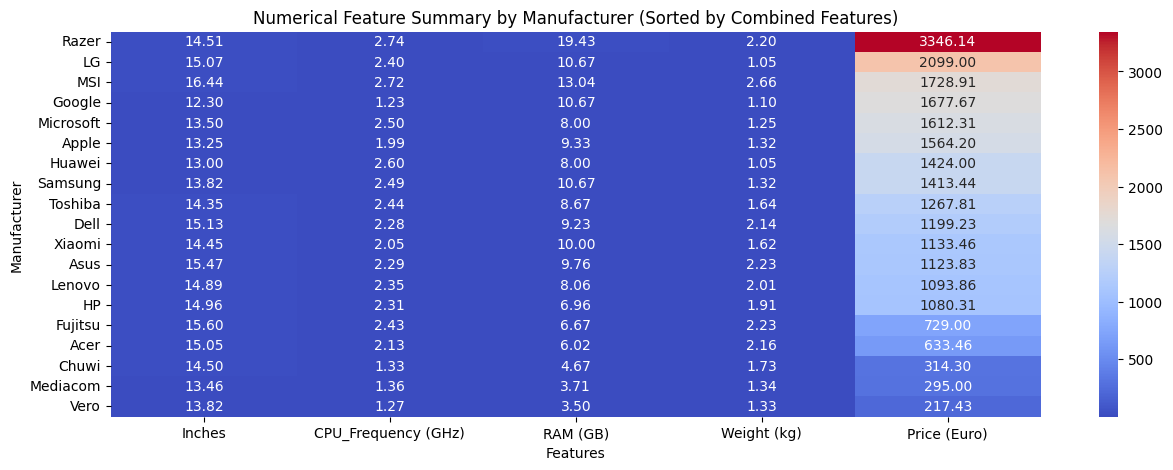

In [ ]:
#Q2
# Getting the categorical and numerical features
numerical_features = laptop_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = laptop_data.select_dtypes(include=['object']).columns

# Grouping by manufacturer and calculating the mean for numerical features
numerical_features_mean = laptop_data.groupby('Company')[numerical_features].mean()

# Define a custom sorting criterion: Sum of all numerical features (or you can use weighted average)
numerical_features_mean['Sorting Criterion'] = numerical_features_mean.sum(axis=1)

# Sort the numerical features DataFrame based on the custom criterion
numerical_features_mean_sorted = numerical_features_mean.sort_values(by='Sorting Criterion', ascending=False).drop(columns='Sorting Criterion')

# Grouping by manufacturer and finding the mode for categorical features
categorical_features_mode = laptop_data.groupby('Company')[categorical_features].agg(lambda x: x.mode().iloc[0])

# Combining numerical and categorical summaries
features_summary = pd.concat([numerical_features_mean_sorted, categorical_features_mode], axis=1)

# Plotting the numerical features visualization with sorted order
plt.figure(figsize=(15, 5))
sns.heatmap(numerical_features_mean_sorted, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Numerical Feature Summary by Manufacturer (Sorted by Combined Features)')
plt.xlabel('Features')
plt.ylabel('Manufacturer')
plt.show()



Since it is not possible to sort all the features collectively, an alternative is to sort by each feature to identify the strongpoints of each company.

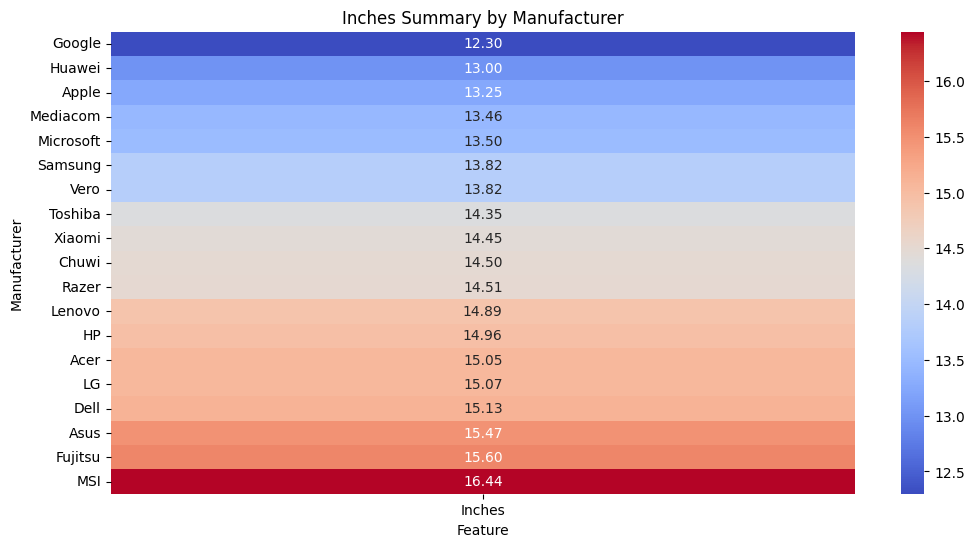

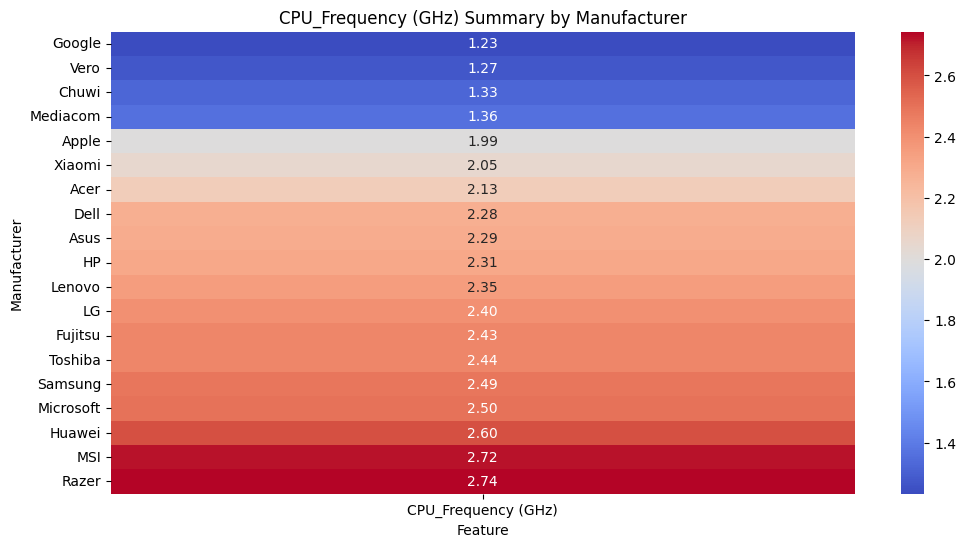

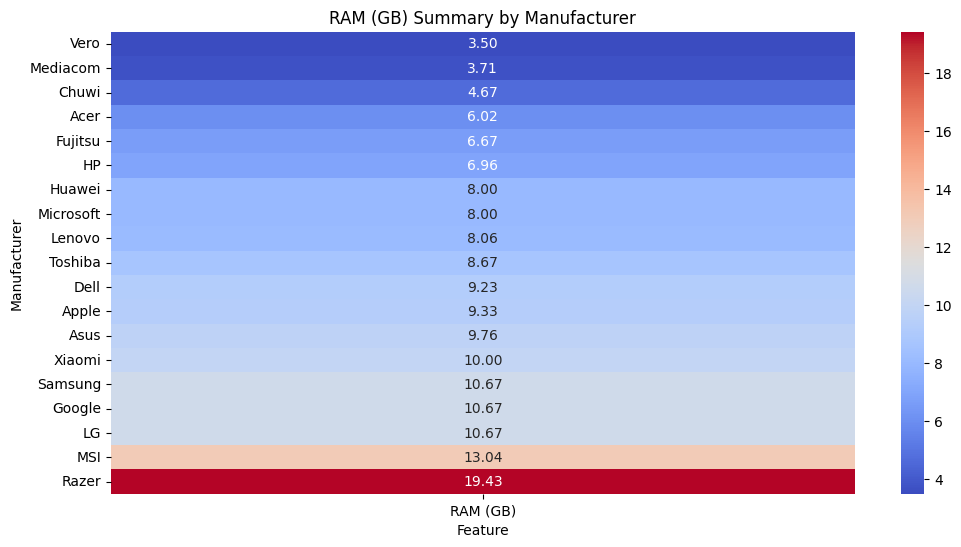

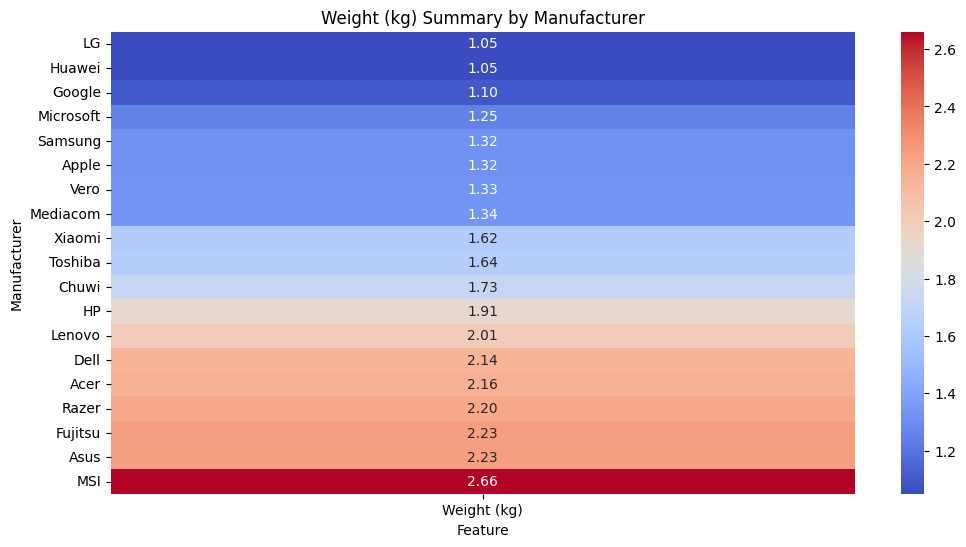

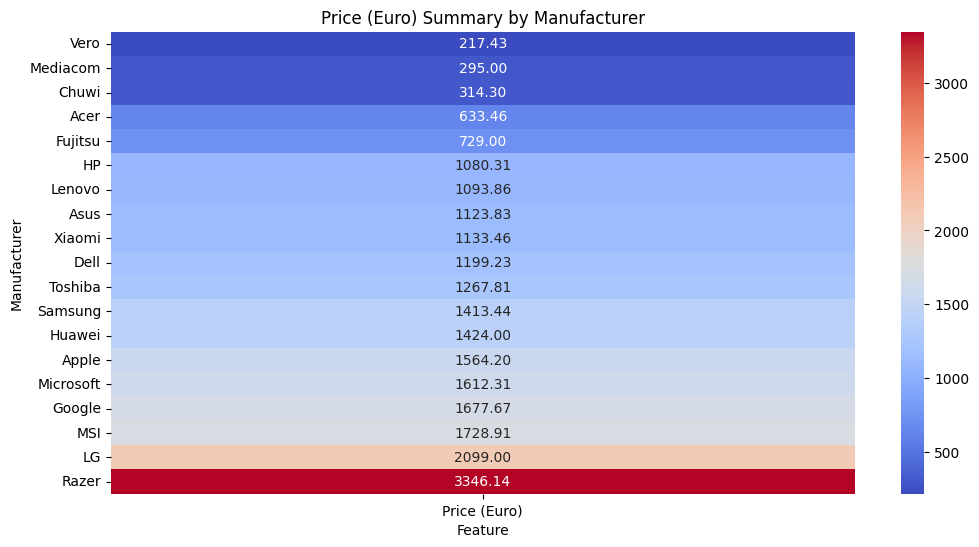

In [92]:
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.heatmap(numerical_features_mean[[feature]].sort_values(by=feature, ascending=True), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{feature} Summary by Manufacturer')
    plt.xlabel('Feature')
    plt.ylabel('Manufacturer')
    plt.show()


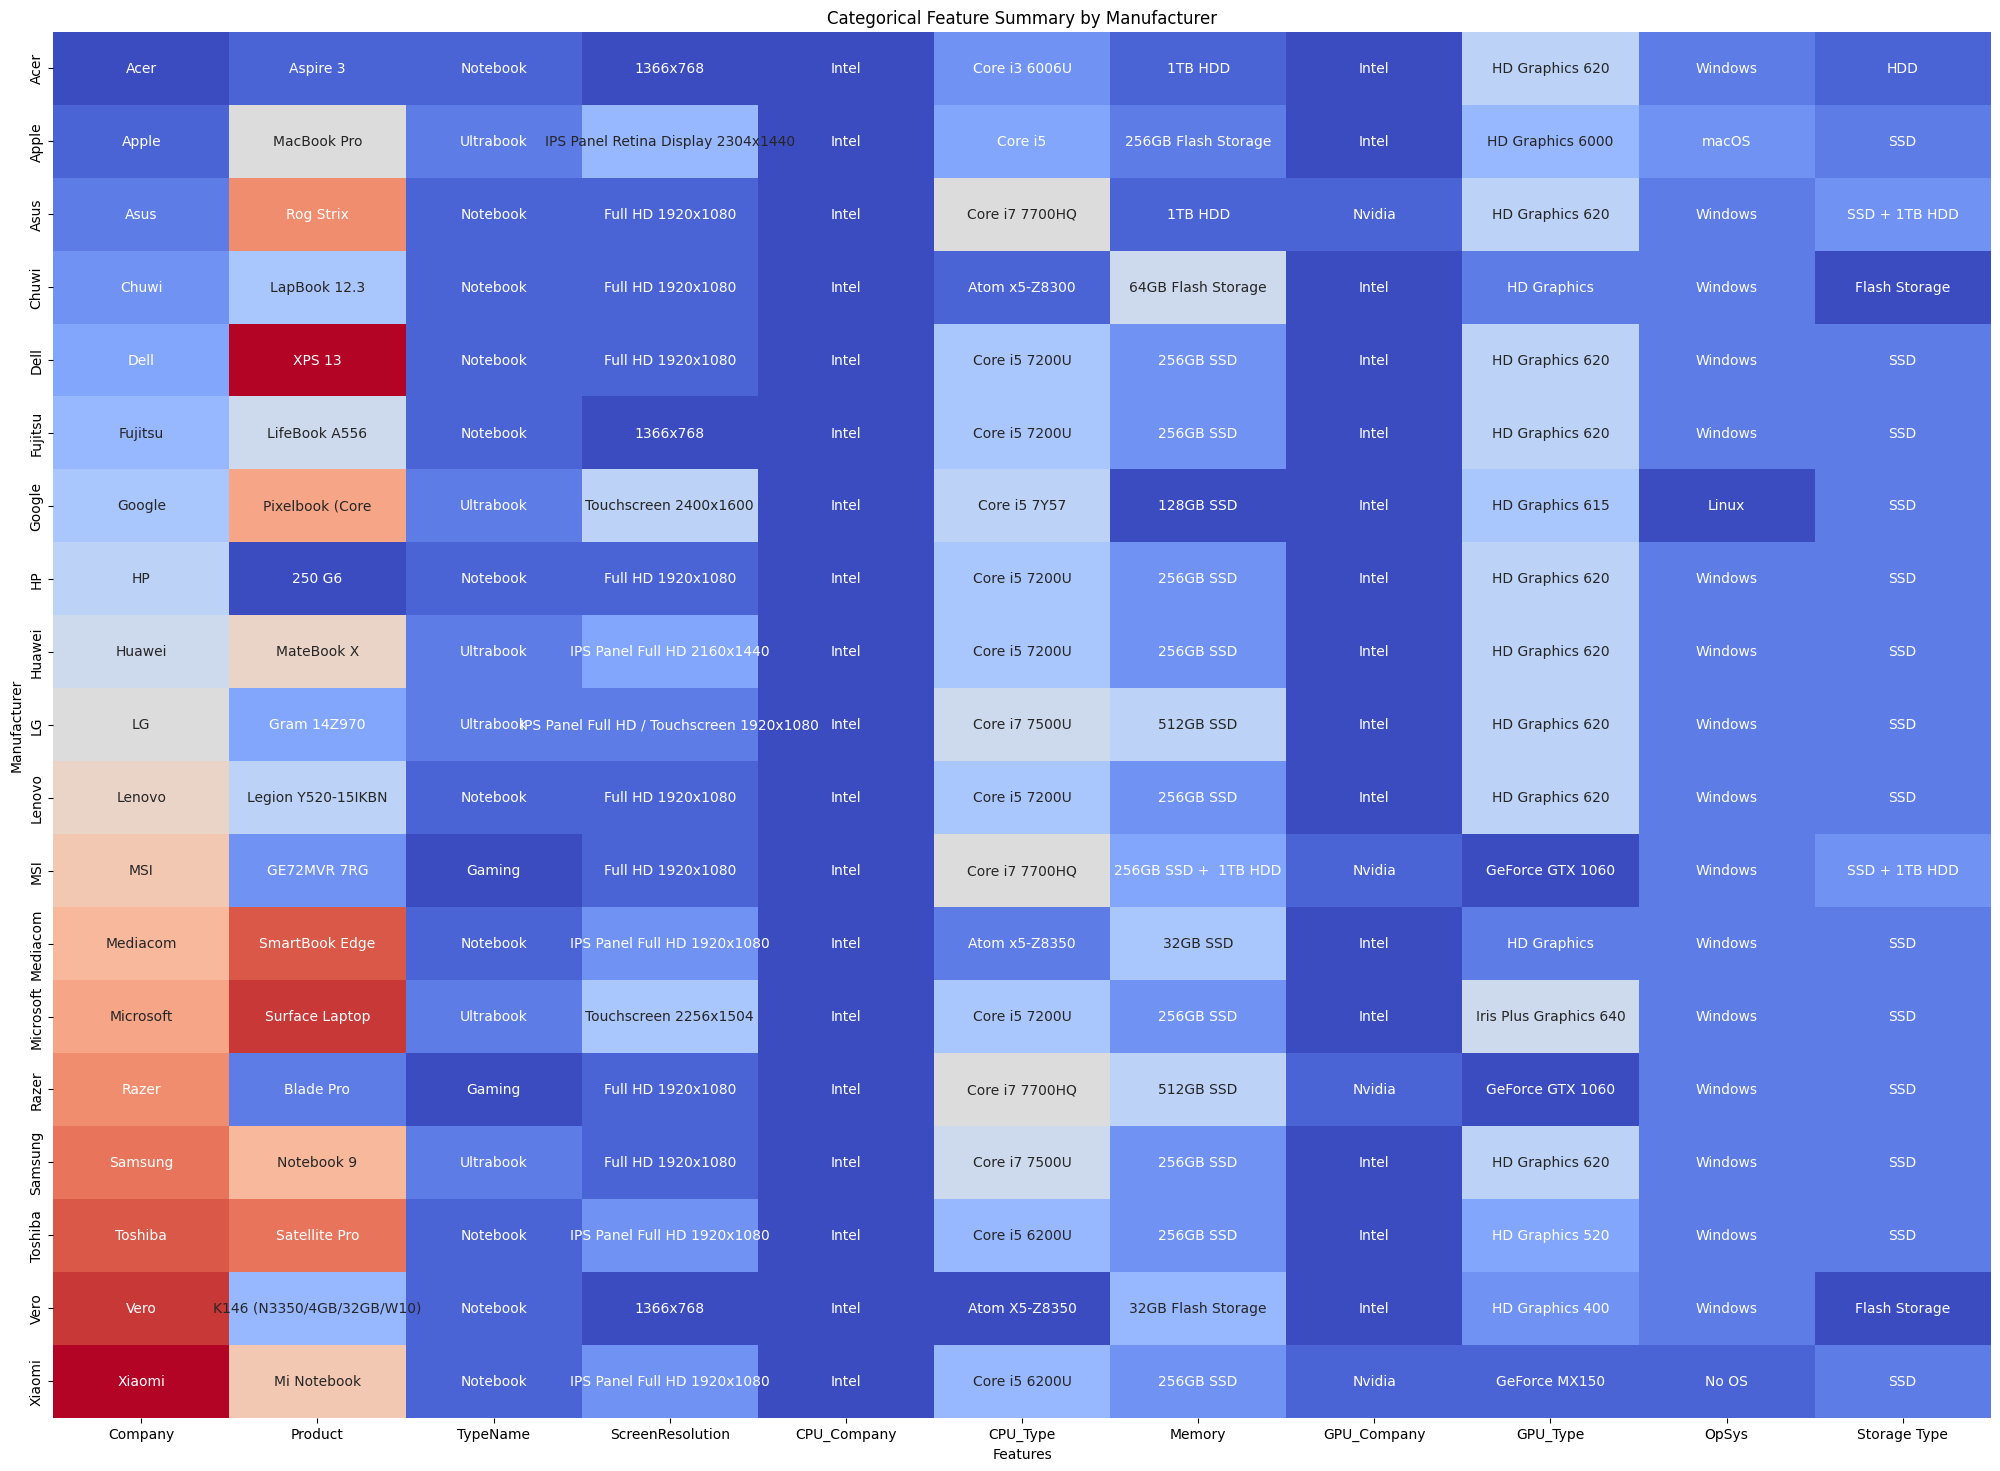

In [90]:
#plotting the categorical features

# Transform categorical summary into a heatmap-friendly format
categorical_summary_encoded = categorical_features_mode.copy()

# Encode strings into numerical values for better visualization
for col in categorical_summary_encoded.columns:
    categorical_summary_encoded[col] = categorical_summary_encoded[col].astype('category').cat.codes

# Plot the heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(categorical_summary_encoded, annot=categorical_features_mode, fmt='', cmap='coolwarm', cbar=False)
plt.title('Categorical Feature Summary by Manufacturer')
plt.xlabel('Features')
plt.ylabel('Manufacturer')
plt.show()

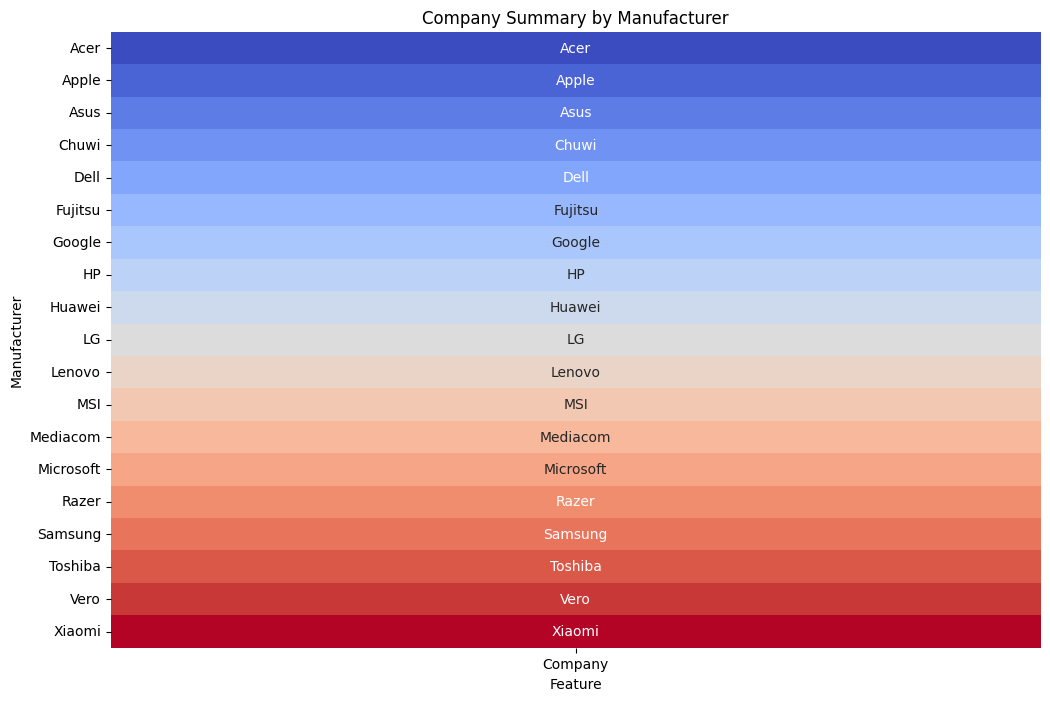

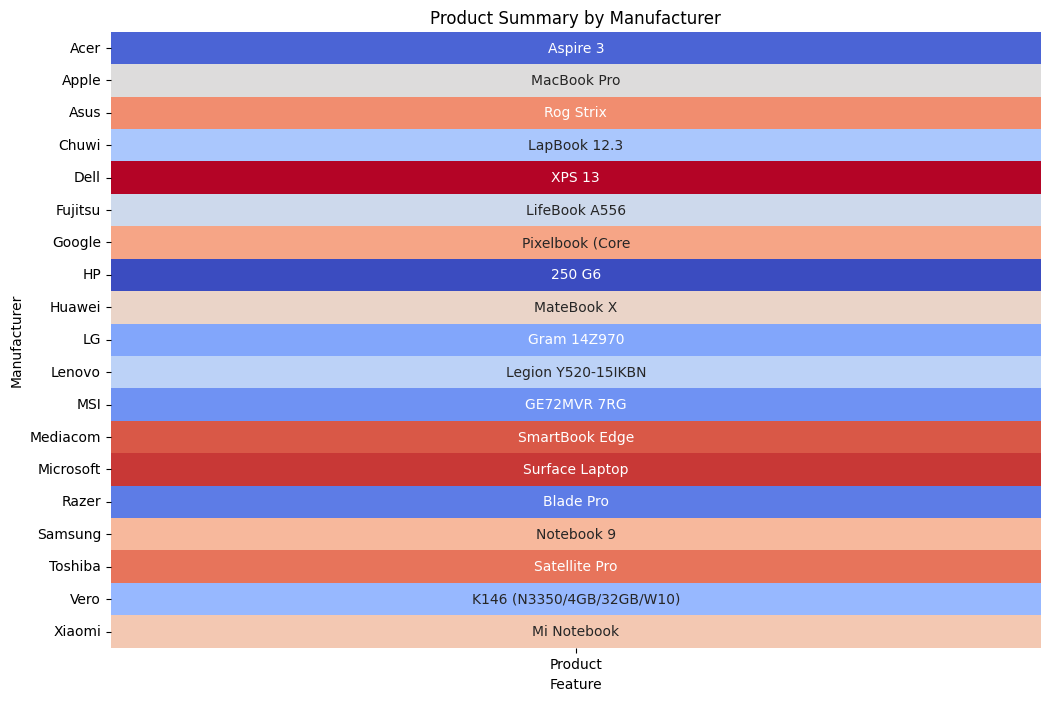

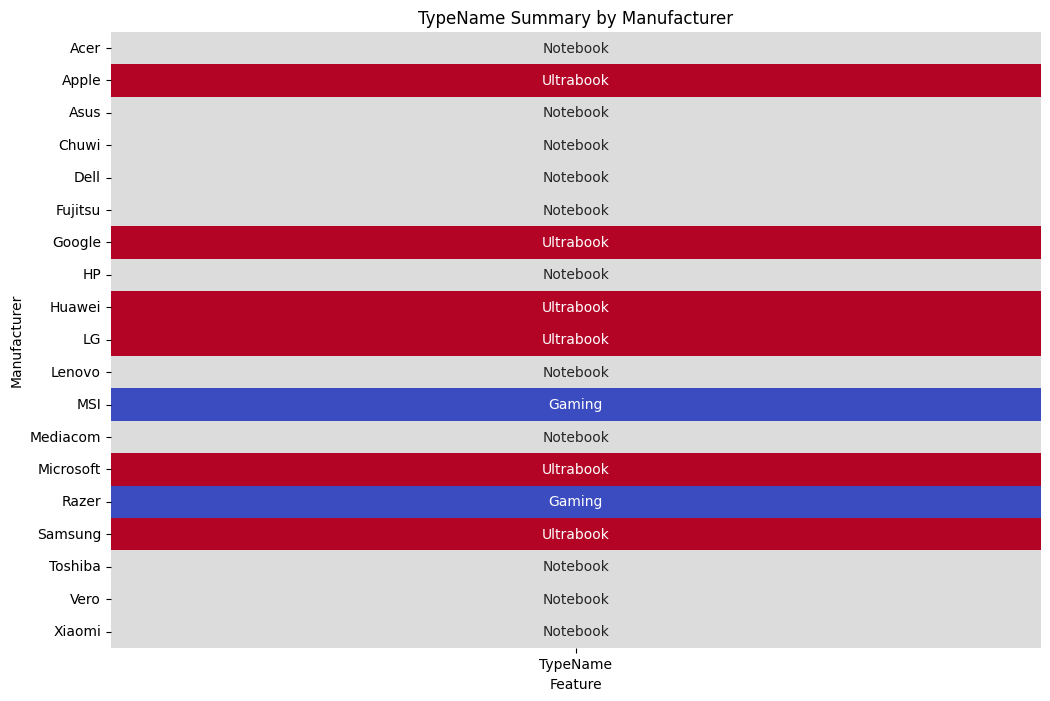

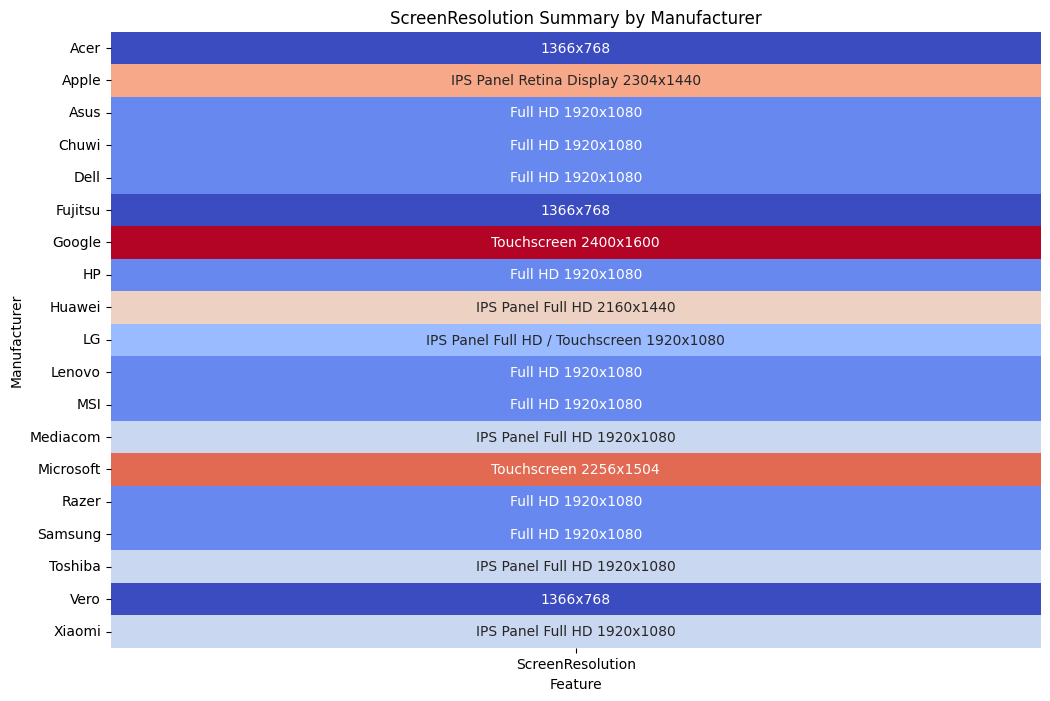

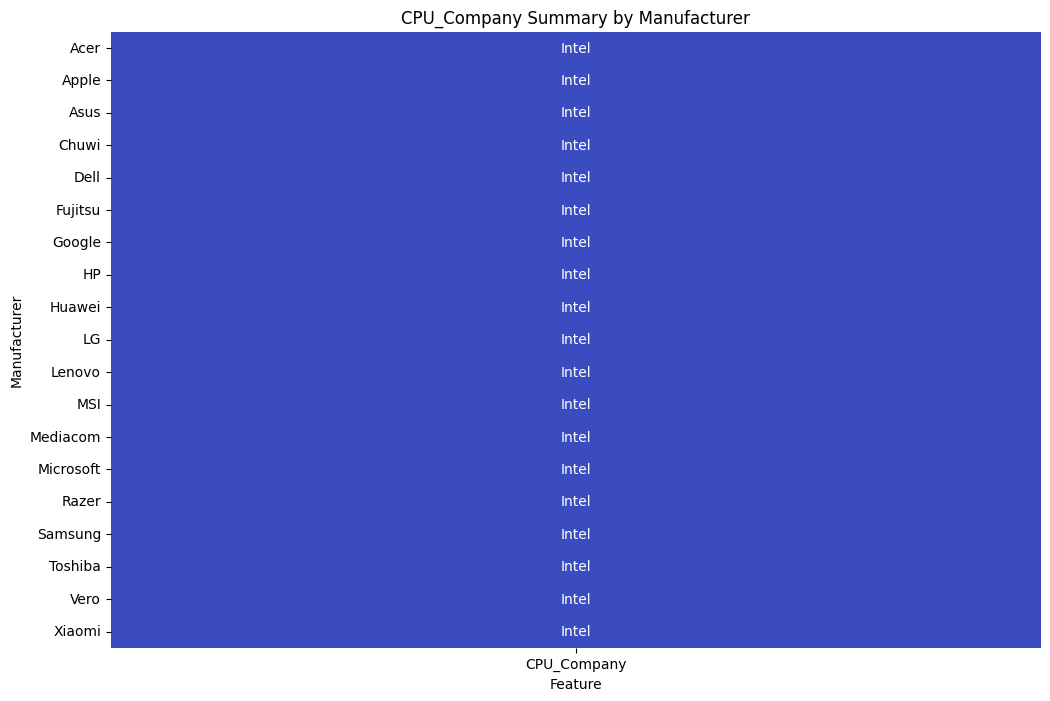

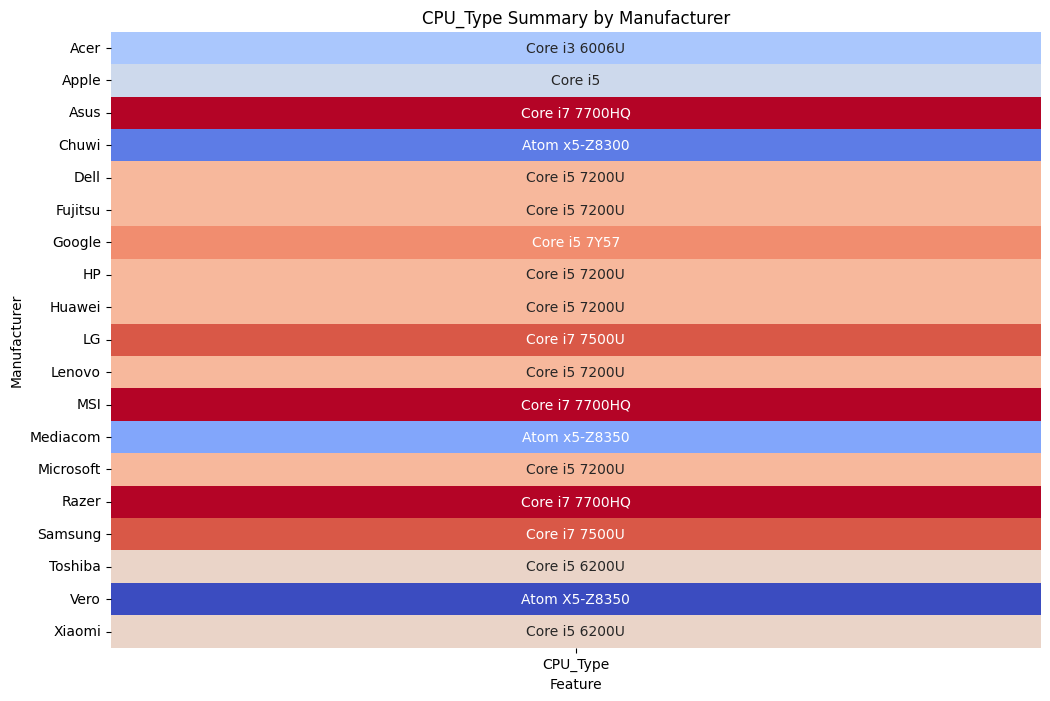

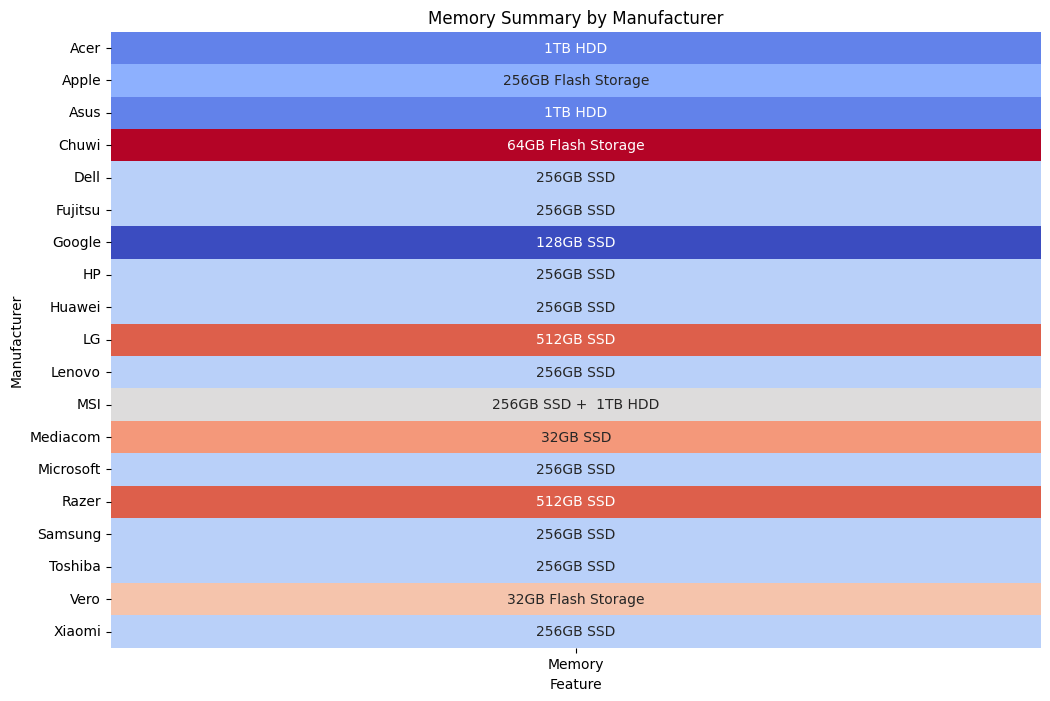

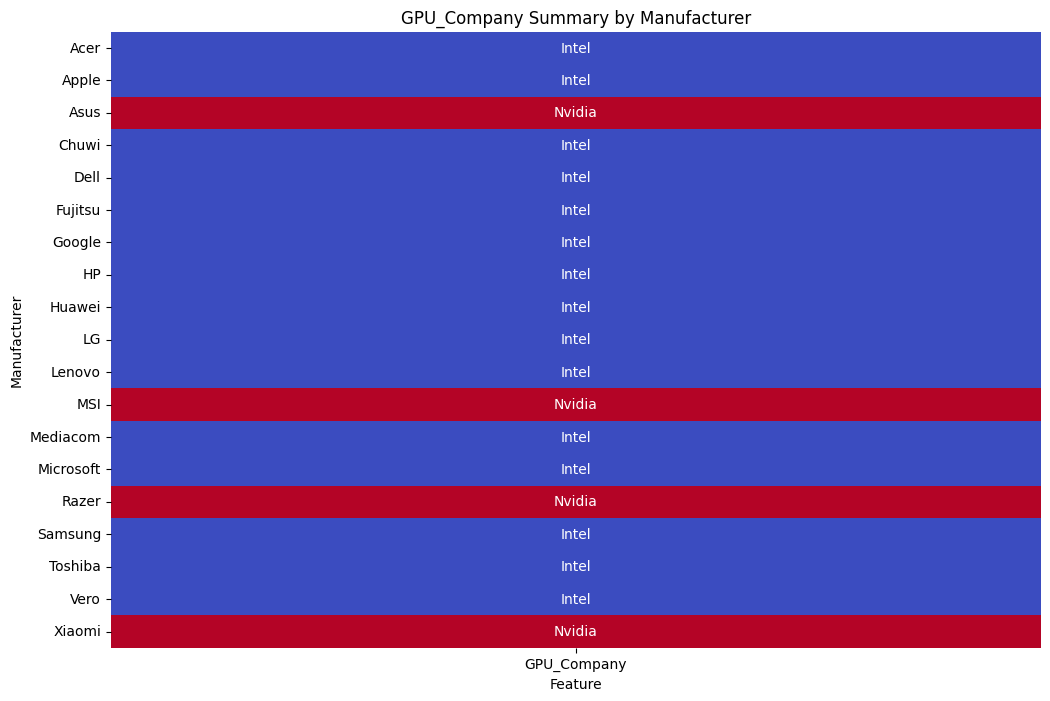

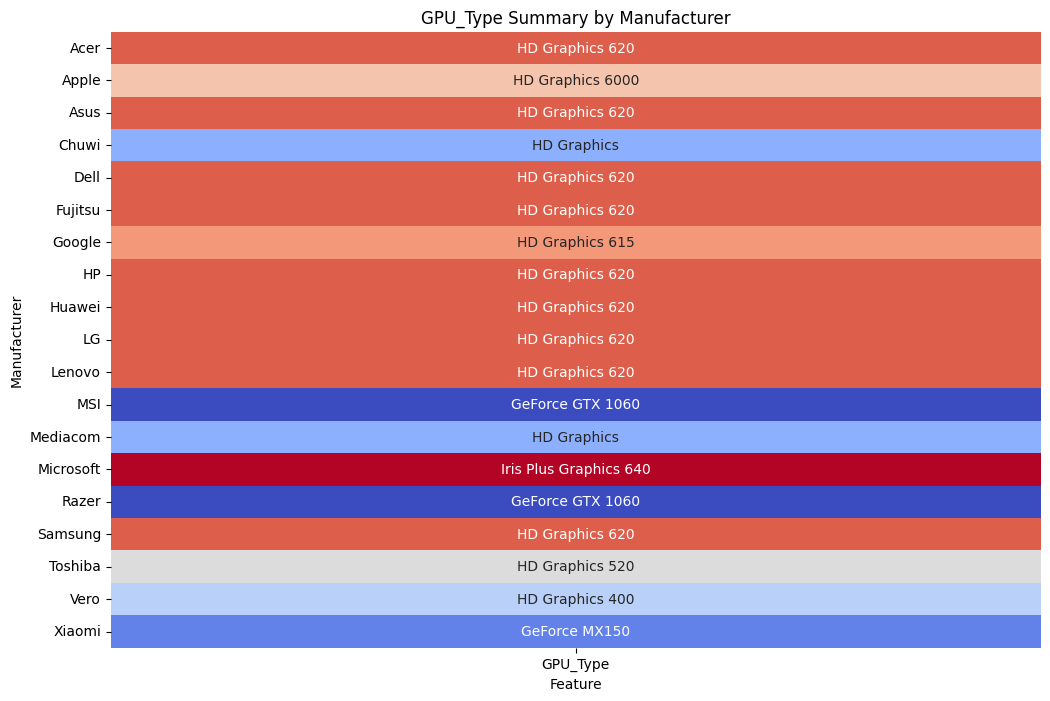

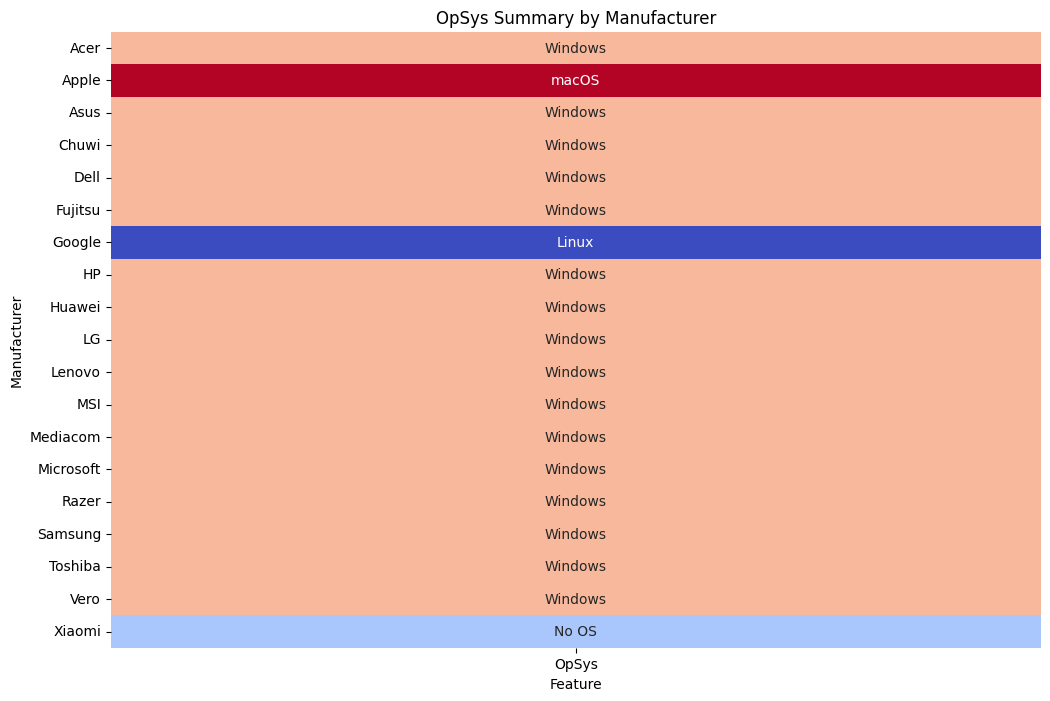

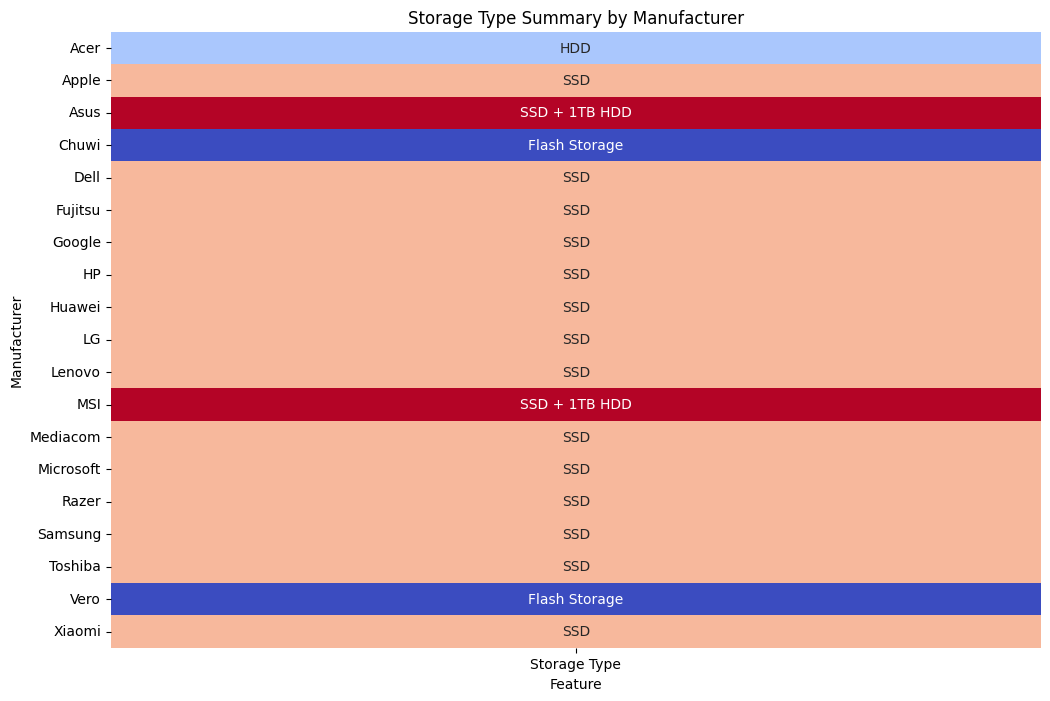

In [100]:
# Iterate through each categorical feature
for col in categorical_features_mode.columns:
    # Create a copy of the categorical feature for visualization
    feature_data = categorical_features_mode[[col]].copy()
    
    # Encode strings into numerical values for heatmap compatibility
    feature_data_encoded = feature_data.copy()
    feature_data_encoded[col] = feature_data_encoded[col].astype('category').cat.codes

    # Plot the heatmap
    plt.figure(figsize=(12, 8))  # Adjust size for each plot
    sns.heatmap(feature_data_encoded, annot=feature_data, fmt='', cmap='coolwarm', cbar=False)
    plt.title(f'{col} Summary by Manufacturer')
    plt.xlabel('Feature')
    plt.ylabel('Manufacturer')
    plt.show()


Performance-Based Value Metrics by Brand (Higher is Better) for Laptops ≤ 1000 Euro:
           RAM_per_Euro  GHz_per_Euro  Value_Score
Company                                           
Vero           0.016249      0.005958     0.022206
Chuwi          0.015254      0.004704     0.019958
Mediacom       0.012816      0.004884     0.017700
Samsung        0.010470      0.004491     0.014961
Acer           0.010265      0.004210     0.014475
Asus           0.010387      0.003767     0.014154
Lenovo         0.010011      0.003943     0.013953
HP             0.009482      0.003847     0.013329
Dell           0.009370      0.003246     0.012616
Fujitsu        0.009000      0.003352     0.012352
MSI            0.008776      0.002862     0.011638
Toshiba        0.007788      0.003499     0.011287
Xiaomi         0.008278      0.002480     0.010759
Apple          0.007029      0.001758     0.008787
Microsoft      0.004044      0.002224     0.006269


/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/254954935.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/254954935.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/254954935.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

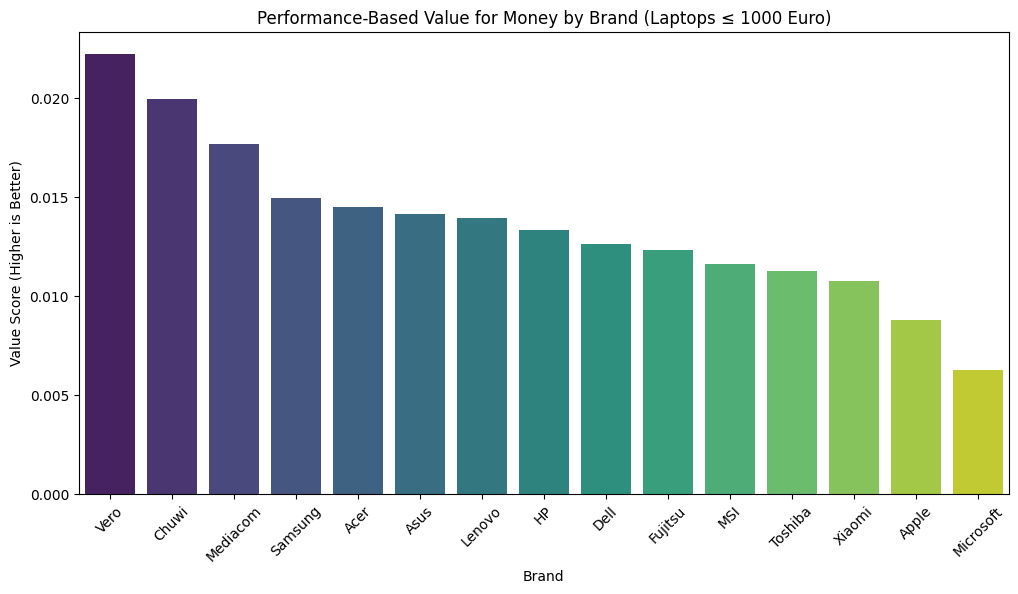

In [ ]:
#Q3
# Apply a threshold for pocket-friendly laptops
threshold_price = 1000  # Example threshold
pocket_friendly_laptops = laptop_data[laptop_data['Price (Euro)'] <= threshold_price]

# Calculate performance per Euro for pocket-friendly laptops
pocket_friendly_laptops['RAM_per_Euro'] = pocket_friendly_laptops['RAM (GB)'] / pocket_friendly_laptops['Price (Euro)']
pocket_friendly_laptops['GHz_per_Euro'] = pocket_friendly_laptops['CPU_Frequency (GHz)'] / pocket_friendly_laptops['Price (Euro)']

# Combine into a single performance-based Value Score
pocket_friendly_laptops['Value_Score'] = pocket_friendly_laptops['RAM_per_Euro'] + pocket_friendly_laptops['GHz_per_Euro']

# Group by brand and calculate the average value score
value_metrics = pocket_friendly_laptops.groupby('Company')[['RAM_per_Euro', 'GHz_per_Euro', 'Value_Score']].mean()

# Sort by Value Score in descending order (higher is better)
value_metrics_sorted = value_metrics.sort_values(by='Value_Score', ascending=False)

# Display results
print("Performance-Based Value Metrics by Brand (Higher is Better) for Laptops ≤ 1000 Euro:")
print(value_metrics_sorted)


# Bar plot for performance-based Value Score
plt.figure(figsize=(12, 6))
sns.barplot(x=value_metrics_sorted.index, y=value_metrics_sorted['Value_Score'], palette='viridis')
plt.title('Performance-Based Value for Money by Brand (Laptops ≤ 1000 Euro)')
plt.ylabel('Value Score (Higher is Better)')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()


The above visualization is not comprehensive enough as I chose two features with respect to price. The below visualization includes a more robust features. We could see that the ranks changed after more features were added. 

Comprehensive Value Metrics by Brand (Higher is Better):
           Comprehensive_Value_Score
Company                             
Toshiba                     0.120480
HP                          0.090221
Acer                        0.070461
Lenovo                      0.067705
Dell                        0.063355
Chuwi                       0.060298
Asus                        0.060112
Xiaomi                      0.058962
Fujitsu                     0.055764
Apple                       0.049707
Vero                        0.049311
Mediacom                    0.037175
MSI                         0.032687
Microsoft                   0.030495
Samsung                     0.021471


/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/1469248605.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




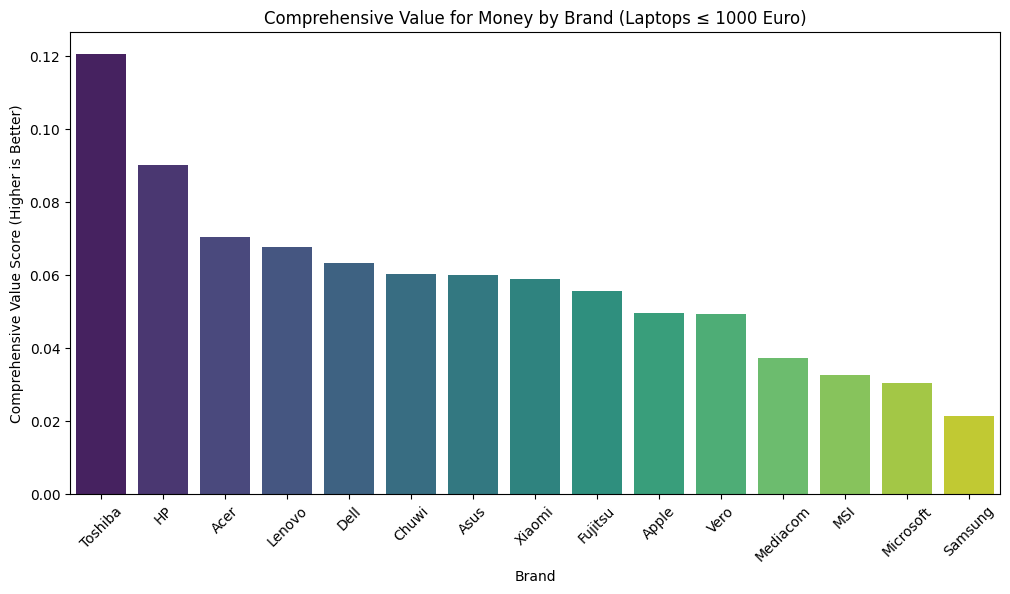

In [105]:
# Calculate price per GB of RAM, GHz of CPU, and GB of storage
laptop_data['Price_per_GB_RAM'] = laptop_data['Price (Euro)'] / laptop_data['RAM (GB)']
laptop_data['Price_per_GHz_CPU'] = laptop_data['Price (Euro)'] / laptop_data['CPU_Frequency (GHz)']

# Assuming 'Memory' column is cleaned to extract storage capacity in GB
# Convert memory to numeric GB for analysis
laptop_data['Storage_Capacity_GB'] = laptop_data['Memory'].str.extract(r'(\d+)').astype(int)
laptop_data['Price_per_GB_Storage'] = laptop_data['Price (Euro)'] / laptop_data['Storage_Capacity_GB']

# For Weight: Price per KG (optional, inversely proportional to value for portability)
laptop_data['Price_per_kg'] = laptop_data['Price (Euro)'] / laptop_data['Weight (kg)']

# Combine these into a single comprehensive value score
# Adjust weights to reflect importance (e.g., RAM: 30%, CPU: 30%, Storage: 20%, Screen Size: 20%)
laptop_data['Comprehensive_Value_Score'] = (
    0.3 * (laptop_data['RAM (GB)'] / laptop_data['Price (Euro)']) +  # Higher is better
    0.3 * (laptop_data['CPU_Frequency (GHz)'] / laptop_data['Price (Euro)']) +  # Higher is better
    0.2 * (laptop_data['Storage_Capacity_GB'] / laptop_data['Price (Euro)']) +  # Higher is better
    0.2 * (laptop_data['Inches'] / laptop_data['Price (Euro)'])  # Higher is better
)

# Apply a threshold for pocket-friendly laptops
threshold_price = 1000  # Adjustable threshold
pocket_friendly_laptops = laptop_data[laptop_data['Price (Euro)'] <= threshold_price]

# Group by brand and calculate the average comprehensive value score
value_metrics = pocket_friendly_laptops.groupby('Company')[['Comprehensive_Value_Score']].mean()

# Sort by Comprehensive Value Score (higher is better)
value_metrics_sorted = value_metrics.sort_values(by='Comprehensive_Value_Score', ascending=False)

# Display results
print("Comprehensive Value Metrics by Brand (Higher is Better):")
print(value_metrics_sorted)


# Bar plot for comprehensive value score
plt.figure(figsize=(12, 6))
sns.barplot(x=value_metrics_sorted.index, y=value_metrics_sorted['Comprehensive_Value_Score'], palette='viridis')
plt.title('Comprehensive Value for Money by Brand (Laptops ≤ 1000 Euro)')
plt.ylabel('Comprehensive Value Score (Higher is Better)')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

Average Prices by Storage Type:
Hybrid (SSD + HDD): €1613.46
SSD Only: €1316.41
HDD Only: €658.50


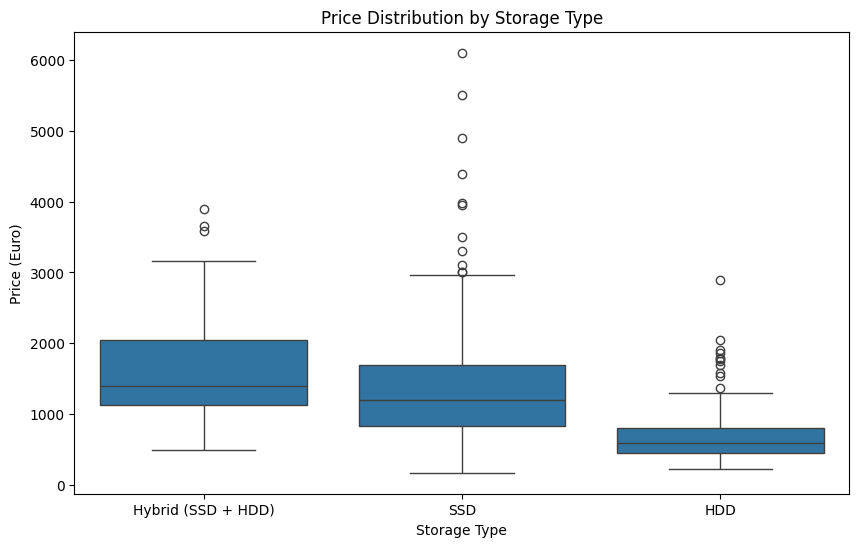

In [106]:
#Q4
#ssd storage only
ssd_only = laptop_data[laptop_data['Storage Type'] == 'SSD'] 
hdd_only = laptop_data[laptop_data['Storage Type'] == 'HDD']
hybrid_storage = laptop_data[laptop_data['Storage Type'].str.contains('SSD.*HDD', regex = True, na = False)]

# Calculate the average price for each storage type
average_prices = {
    'Hybrid (SSD + HDD)': hybrid_storage['Price (Euro)'].mean(),
    'SSD Only': ssd_only['Price (Euro)'].mean(),
    'HDD Only': hdd_only['Price (Euro)'].mean()
}

# Display the average prices
print("Average Prices by Storage Type:")
for storage_type, avg_price in average_prices.items():
    print(f"{storage_type}: €{avg_price:.2f}")

# Visualization: Boxplot for Price Distribution by Storage Type
laptop_data['Storage Category'] = laptop_data['Storage Type'].apply(
    lambda x: 'Hybrid (SSD + HDD)' if 'SSD' in x and 'HDD' in x else x
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop_data, x='Storage Category', y='Price (Euro)', order=['Hybrid (SSD + HDD)', 'SSD', 'HDD'])
plt.title('Price Distribution by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Price (Euro)')
plt.show()